In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from nest import detectors
from nest import pls
from nest import overlap 
from nest import nell 
from nest import skymap

from nest.skymap import Skymaps
from nest.overlap import Response
from nest.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

from astropy.cosmology import Planck15
cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

c = 299792458 #m/s

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'


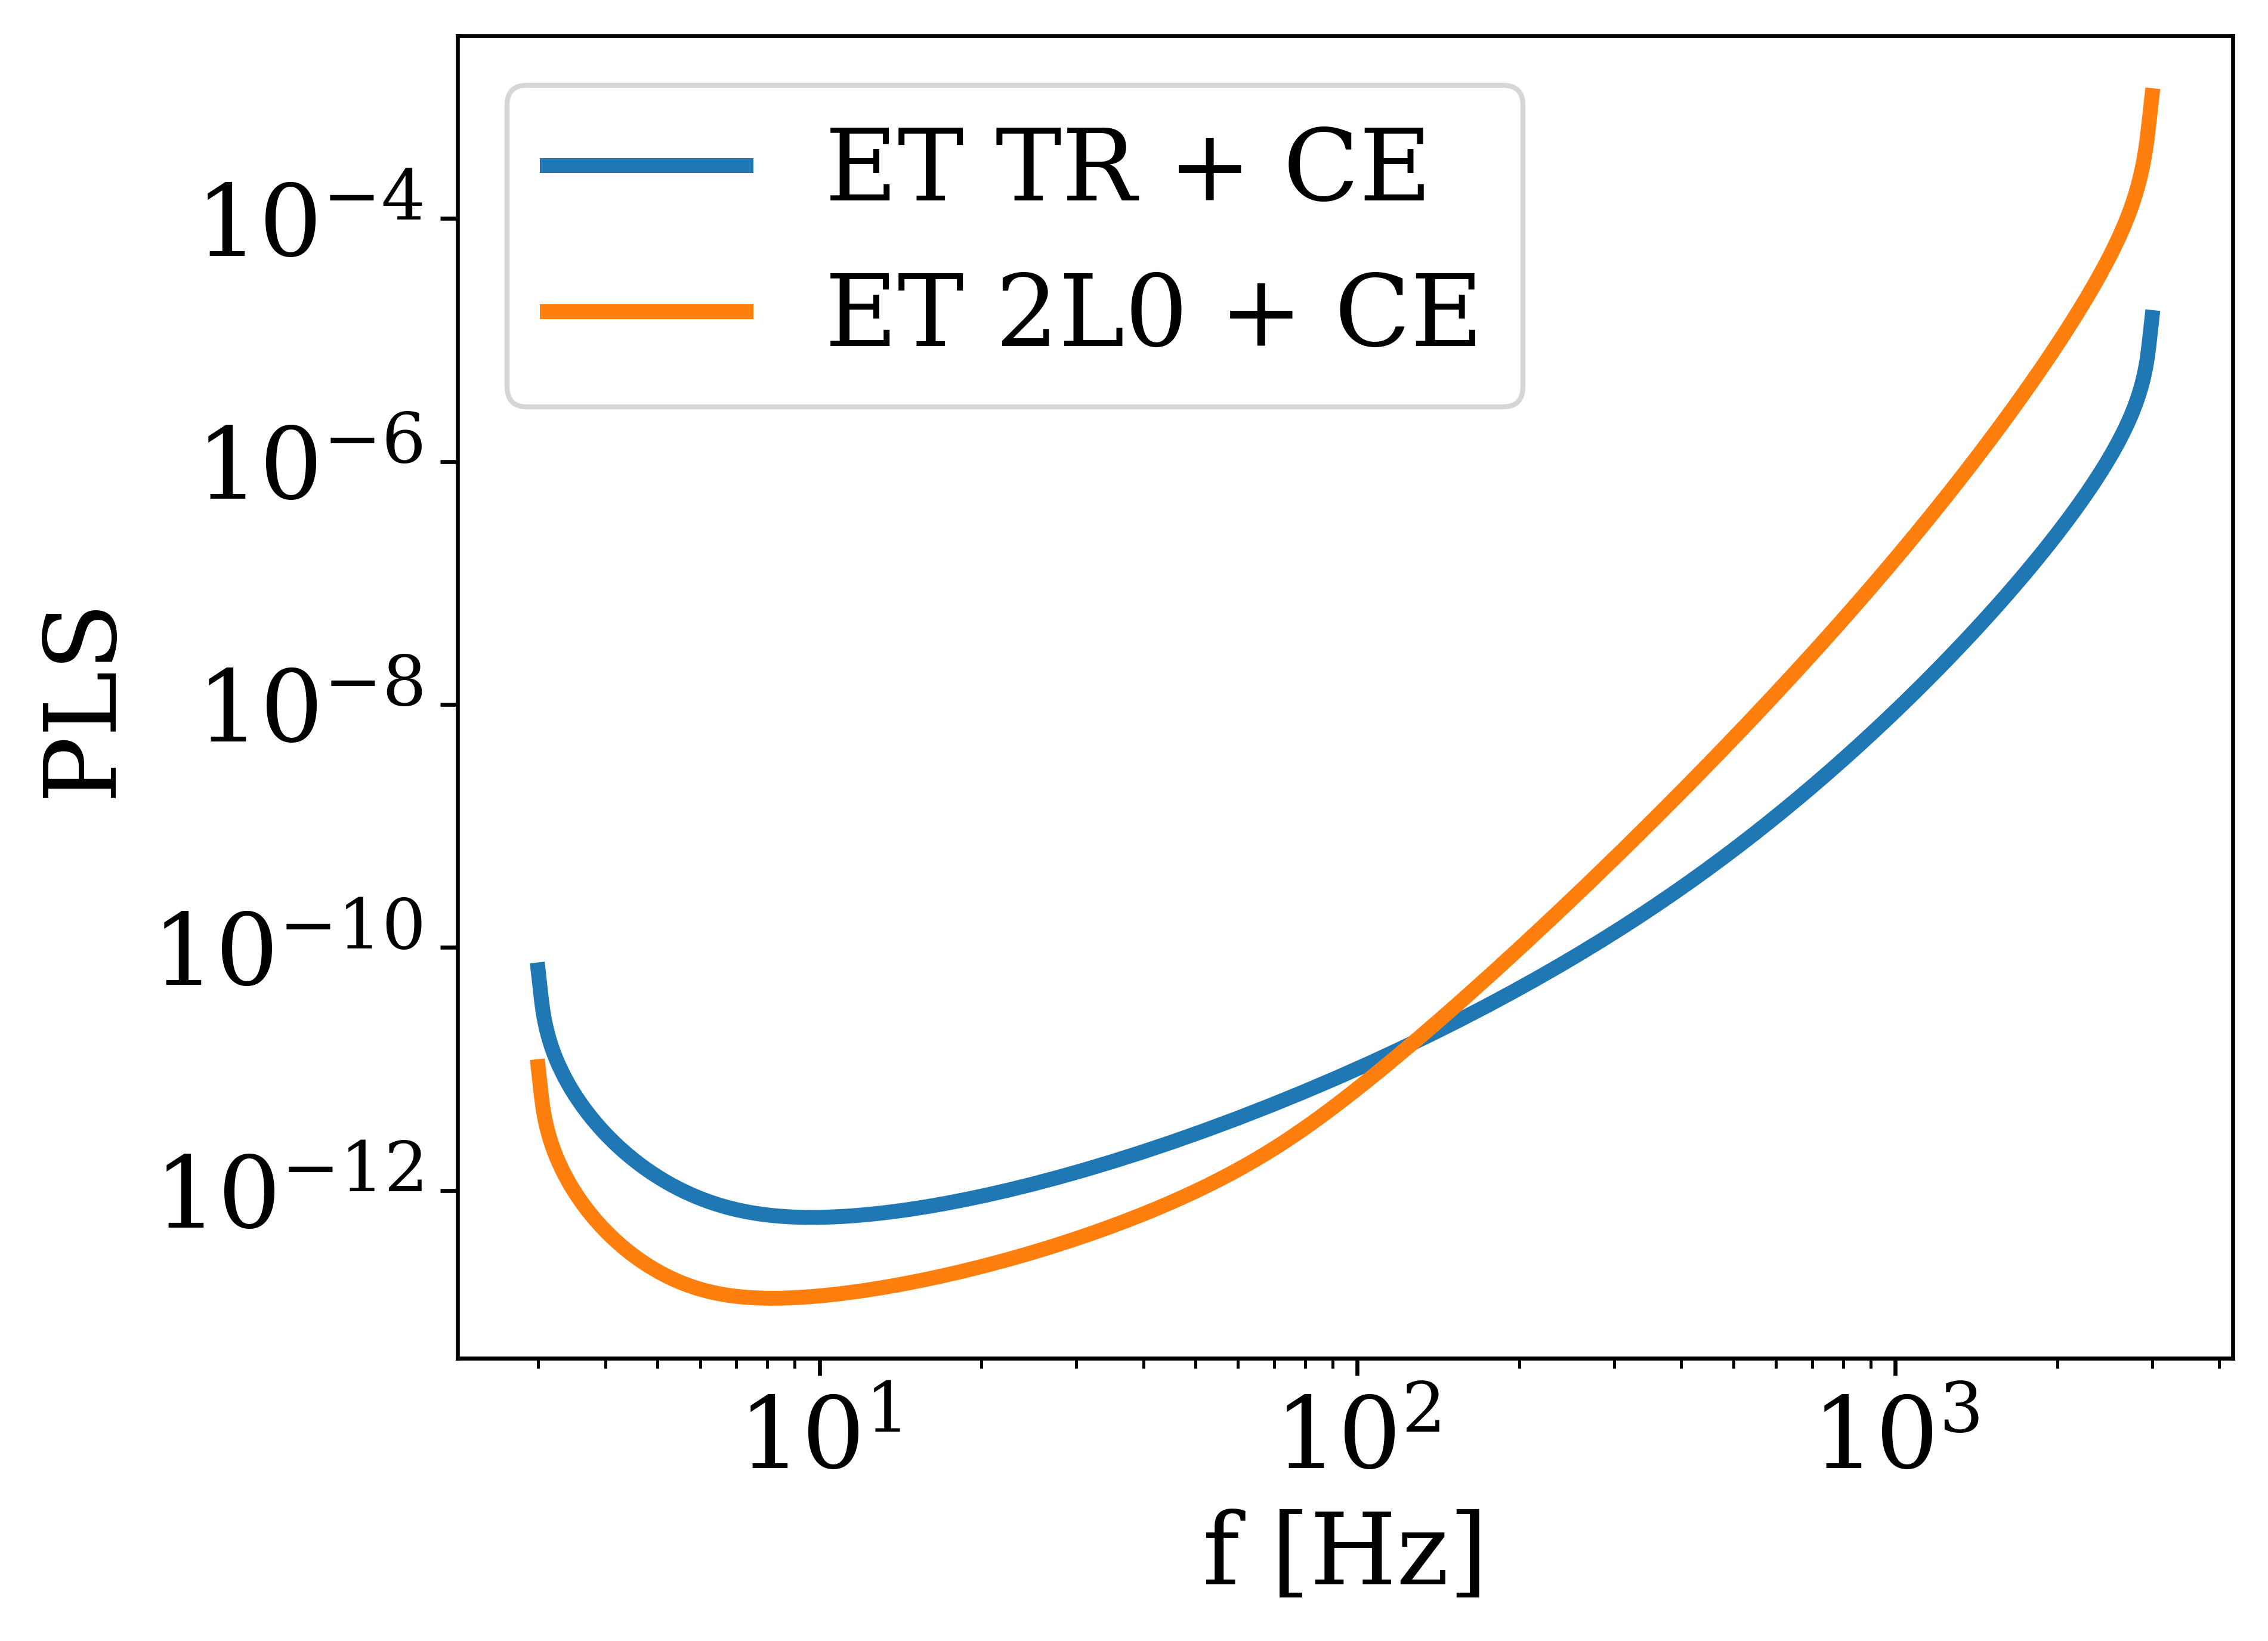

In [37]:
fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

f = np.logspace(np.log10(3), np.log10(3000), 1000)

pls_t_ettr_CE_2 = pls.PLS_multi('ET A', 'ET B', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_t_et2L0_CE_2 = pls.PLS_multi('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, None)

plt.plot(f, pls_t_ettr_CE_2, label='ET TR + CE')
plt.plot(f, pls_t_et2L0_CE_2, label='ET 2L0 + CE')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('PLS')
plt.show()


* ET $\Delta$ + CE

In [38]:
# tensor + vector modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_tv_etCE = pls.PLS_2pol('ET A', 'ET B', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_ts_etCE = pls.PLS_2pol('ET A', 'ET B', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

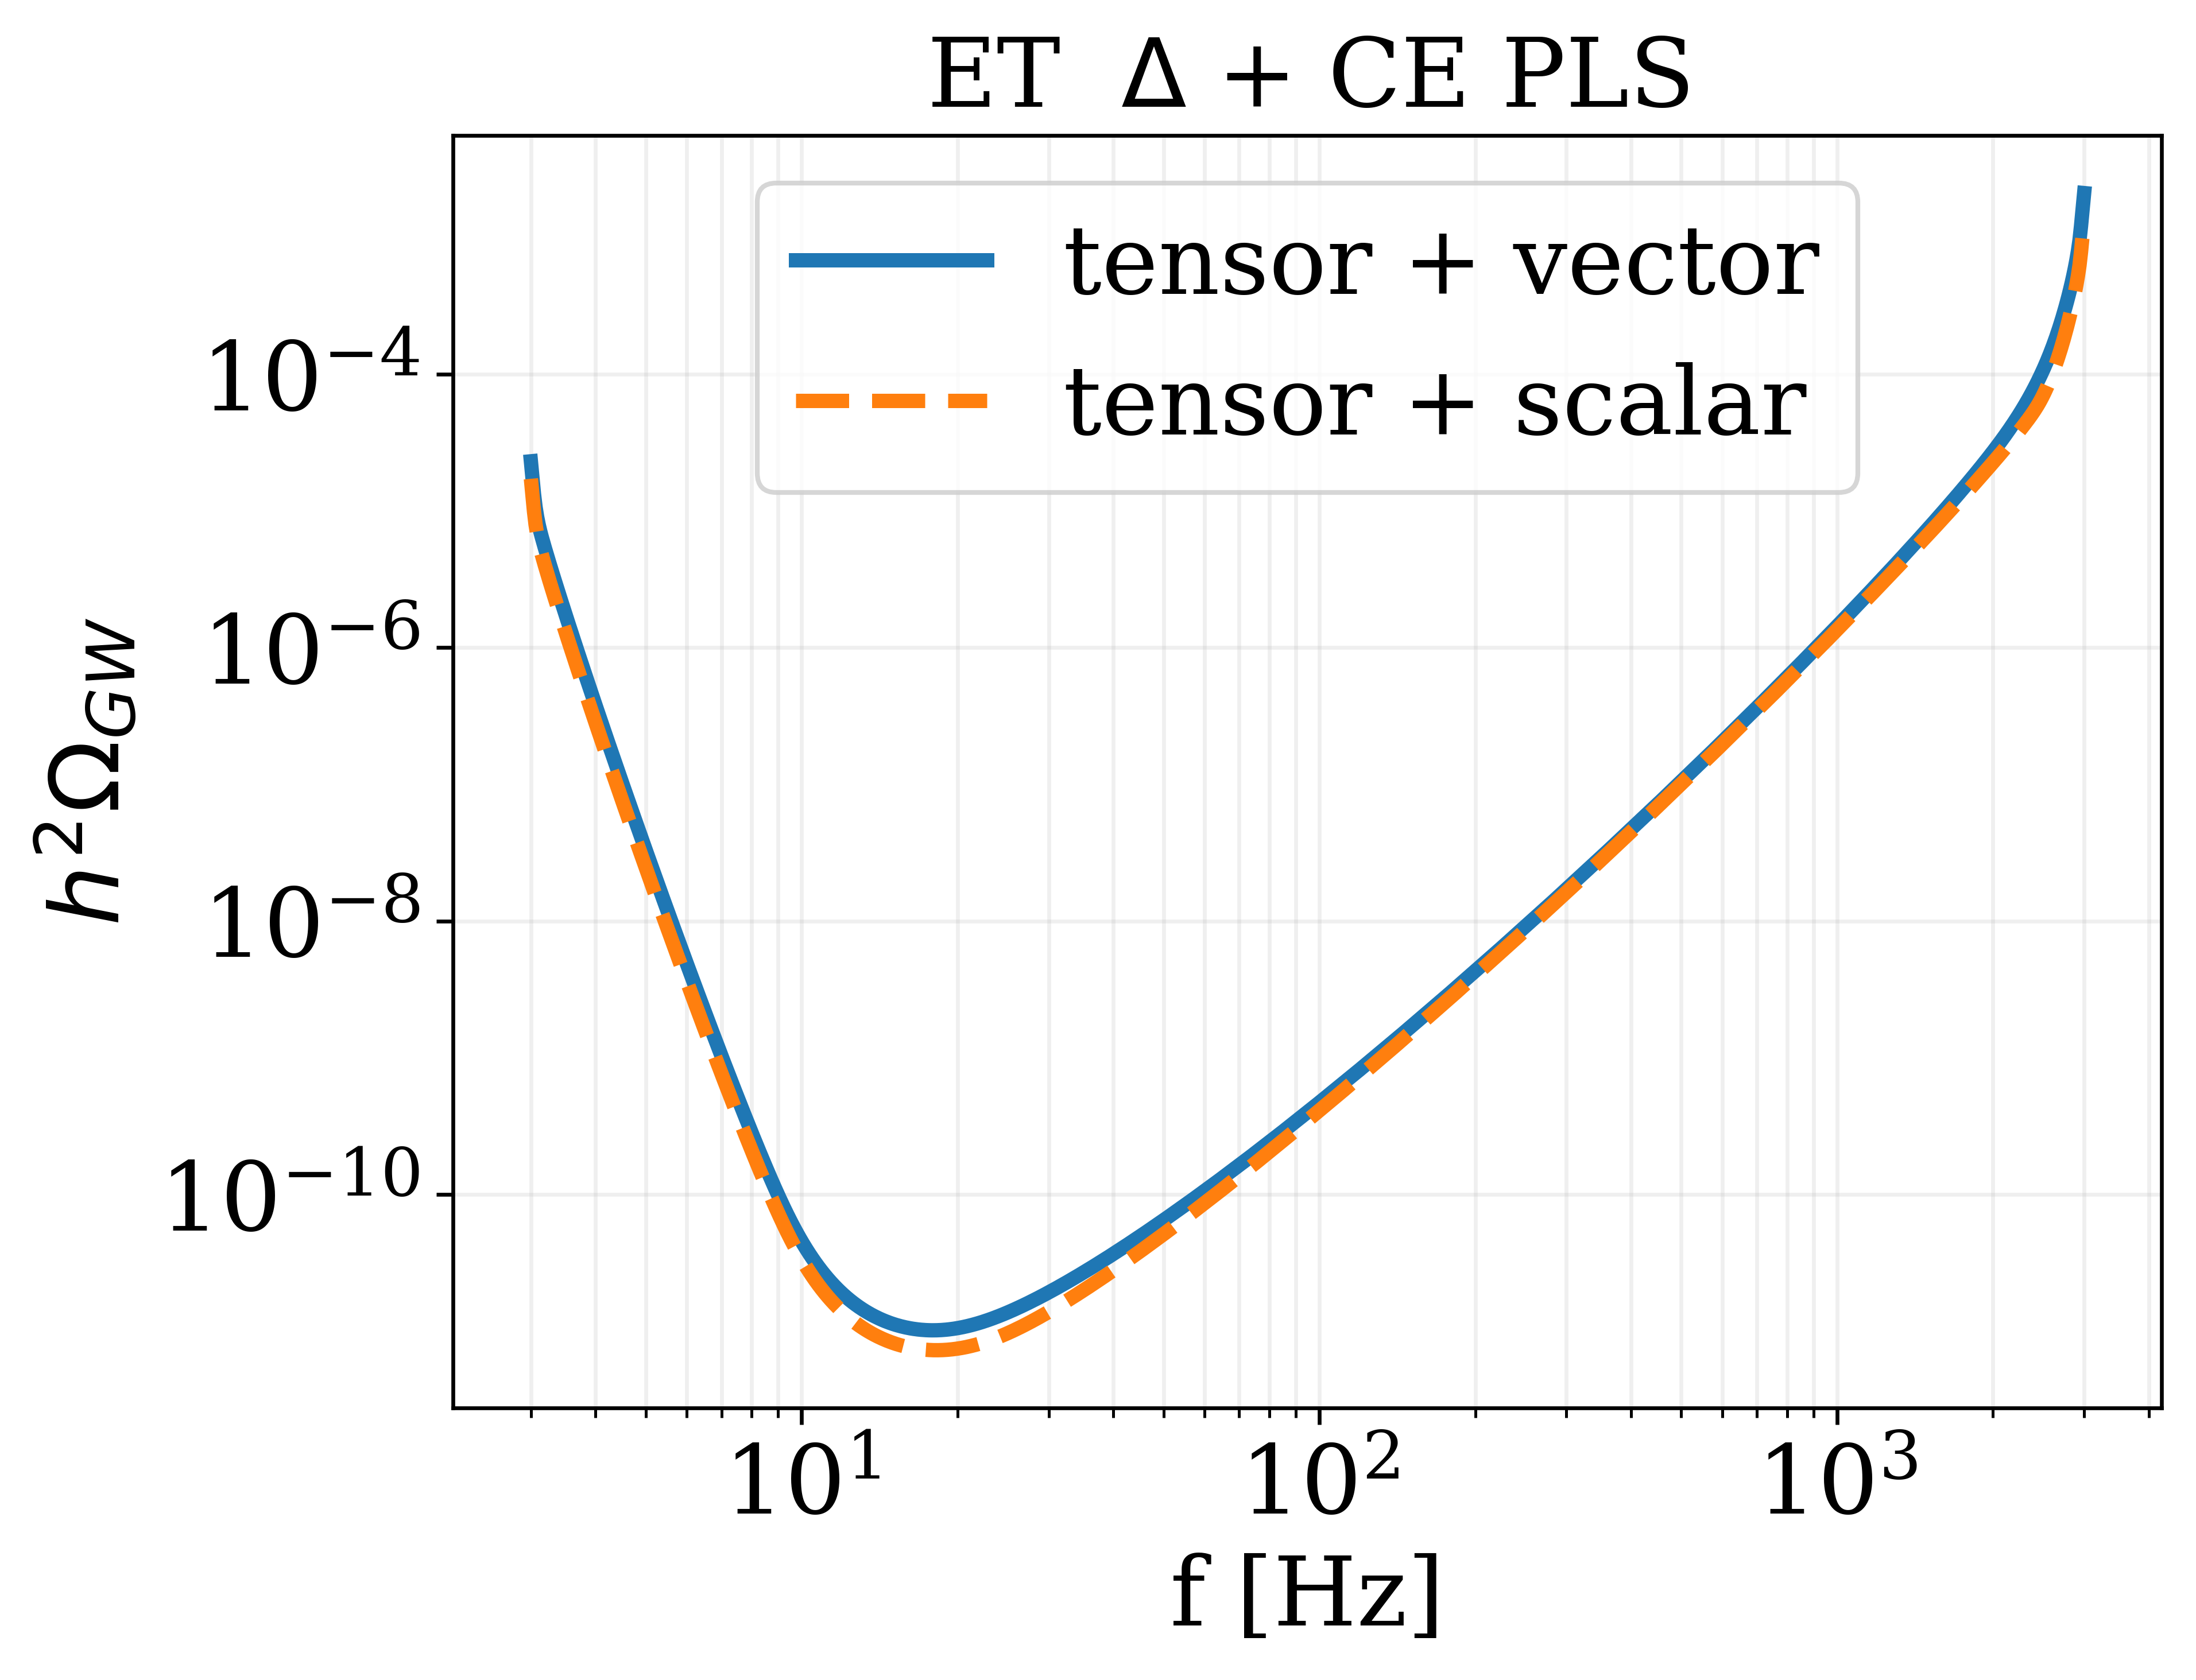

In [39]:
plt.plot(f, pls_tv_etCE, label='tensor + vector')
plt.plot(f, pls_ts_etCE, label='tensor + scalar', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()


In [4]:
# find minimum

min_PLS_tv = np.min(pls_tv_etCE)
print('min PLS tv', min_PLS_tv)

min_PLS_ts = np.min(pls_ts_etCE)
print('min PLS ts', min_PLS_ts)

min PLS tv 1.0168976149987585e-11
min PLS ts 7.273415202323737e-12


In [53]:
# tensor + vector + scalar modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_t_etCE = pls.PLS_3pol('ET A', 'ET B', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_v_etCE = pls.PLS_3pol('ET A', 'ET B', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_s_etCE = pls.PLS_3pol('ET A', 'ET B', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

In [28]:
pls_t_etCE_2 = pls.PLS_multi('ET A', 'ET B', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, None)

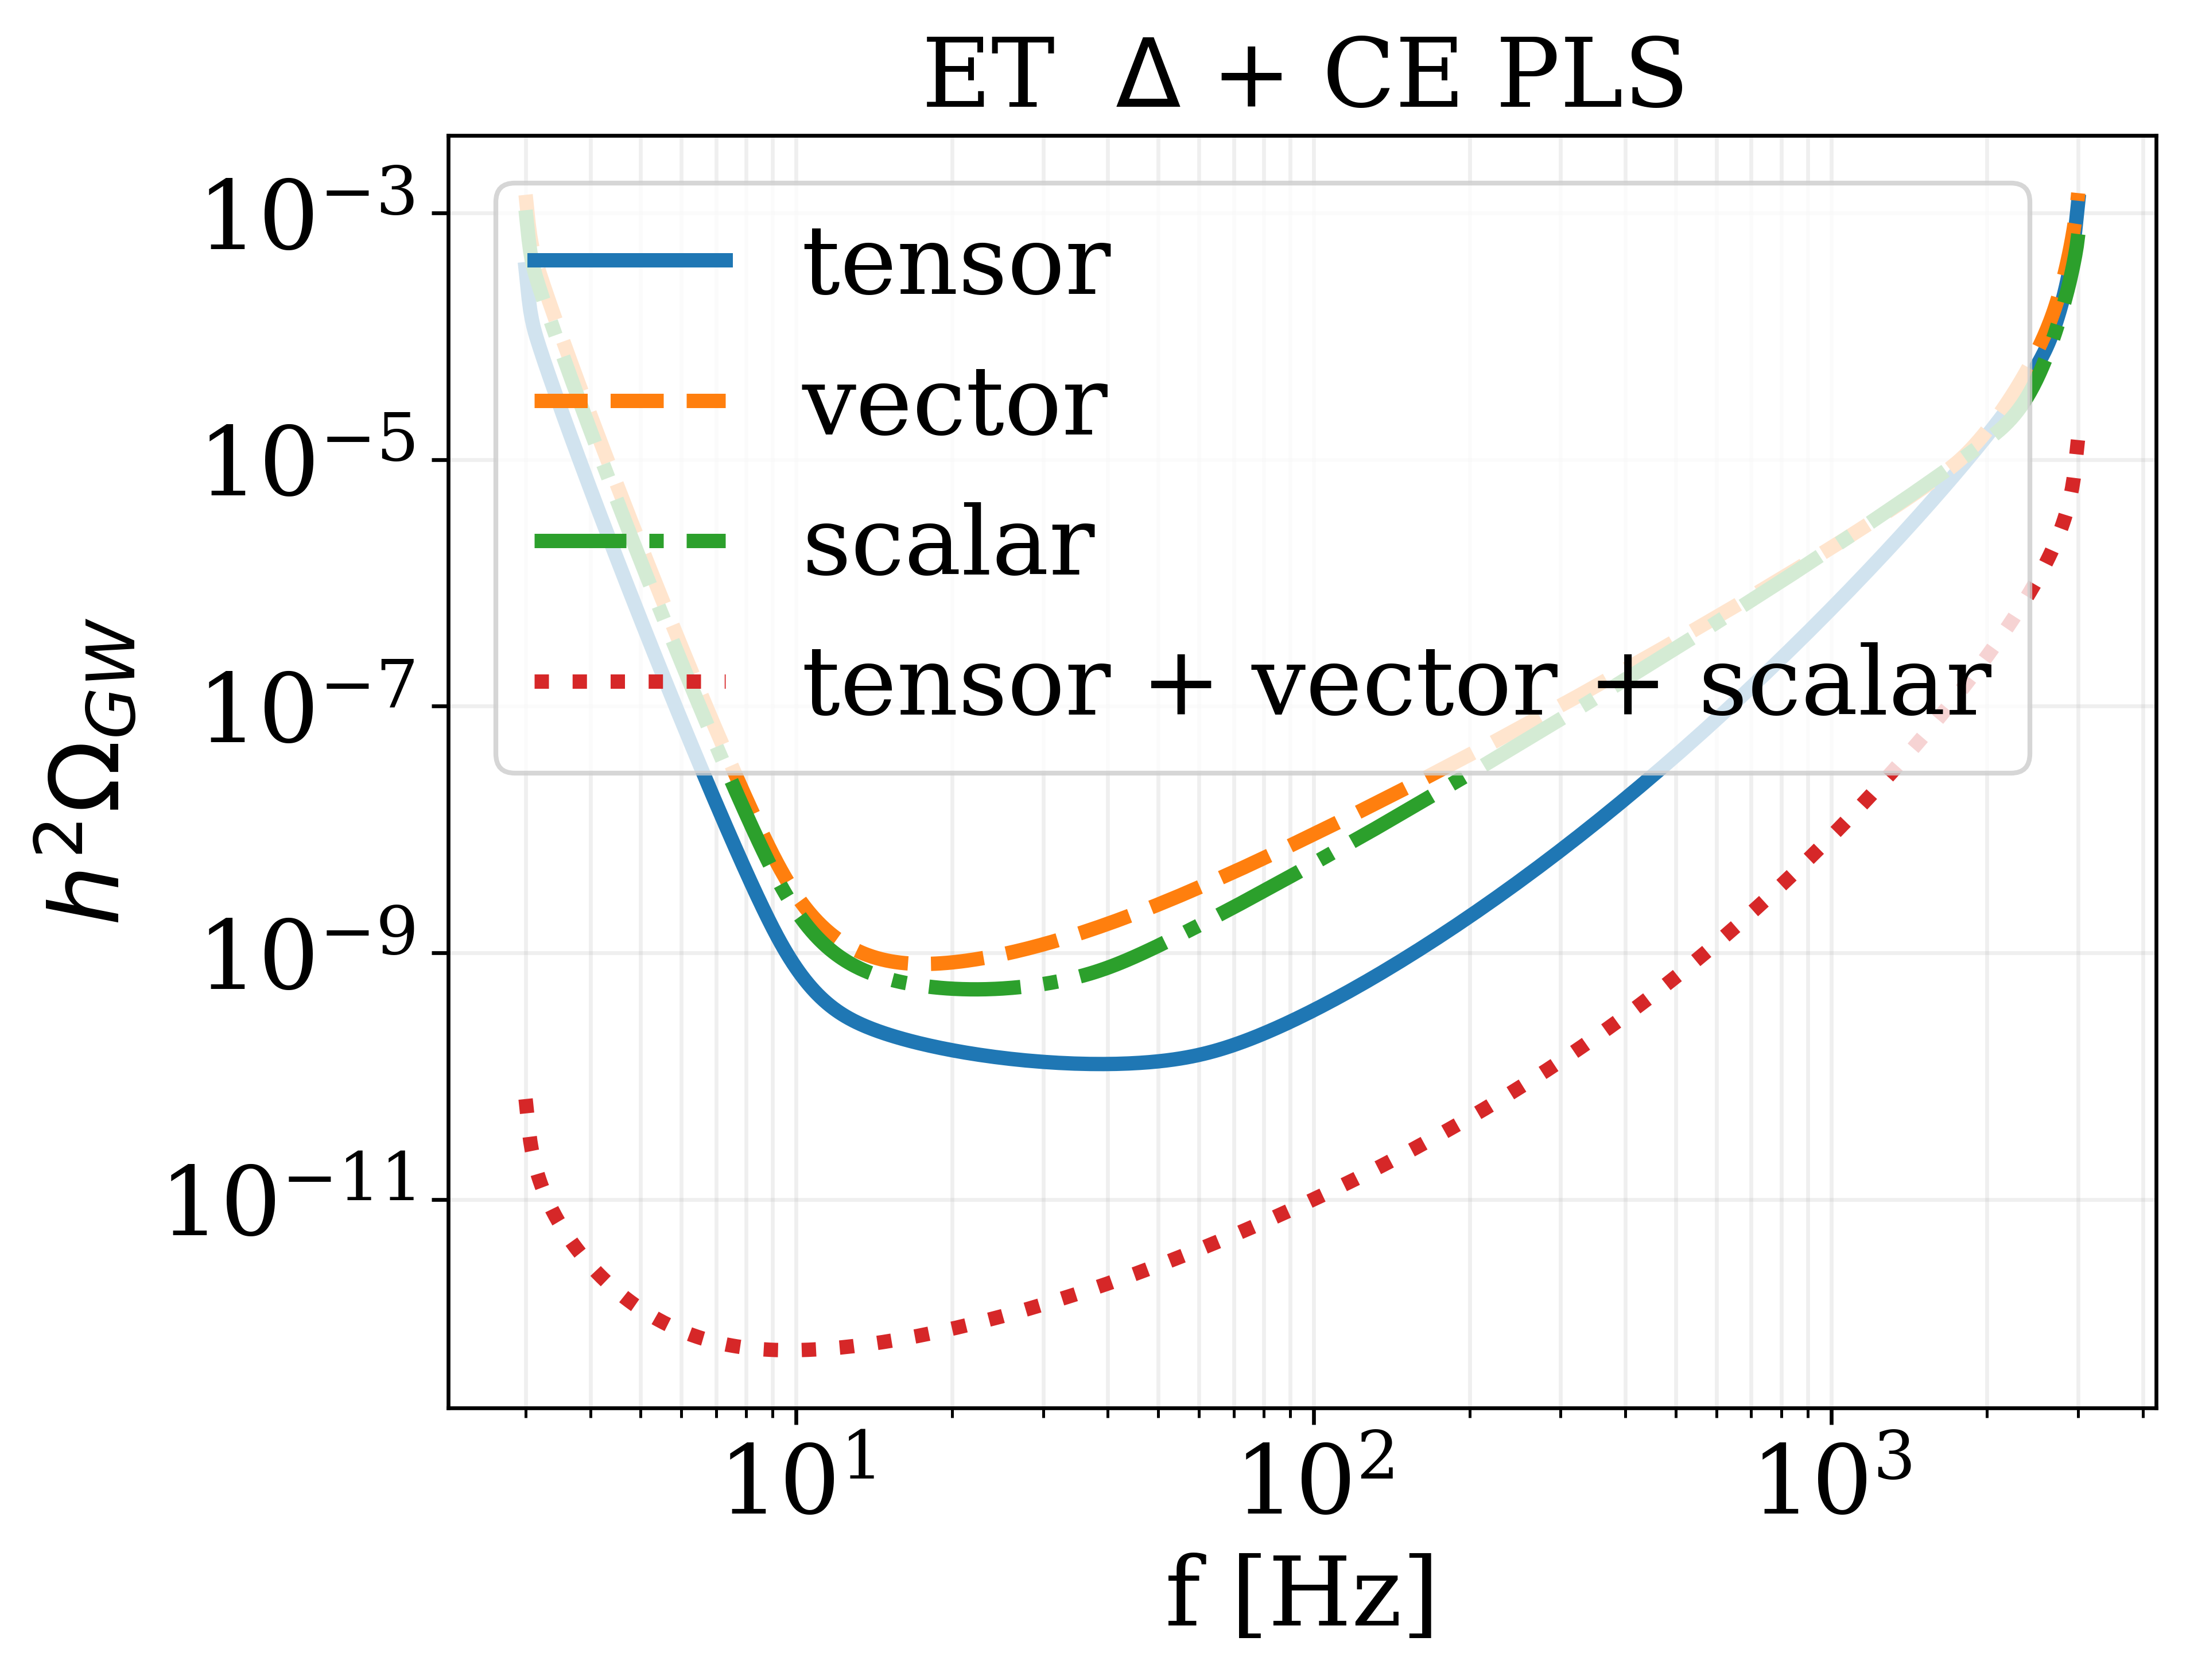

In [29]:
plt.plot(f, pls_t_etCE, label='tensor ')
plt.plot(f, pls_v_etCE, label='vector', linestyle='--')
plt.plot(f, pls_s_etCE, label='scalar', linestyle='-.')
#plt.plot(f, pls_t_etCE_2, label='tensor + vector + scalar', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [52]:
# find minimum

min_PLS_t = np.min(pls_t_etCE)  
print('min PLS t', min_PLS_t)

min_PLS_v = np.min(pls_v_etCE)
print('min PLS v', min_PLS_v)

min_PLS_s = np.min(pls_s_etCE)
print('min PLS s', min_PLS_s)

min PLS t 2.6398369765949982e-11
min PLS v 3.2492258137061056e-11
min PLS s 2.3674025757259072e-11


In [47]:
orf_reweighted_t = overlap.overlap_3pol('ET A', 'ET B', 'CE', f, 't', None)
orf_reweighted_v = overlap.overlap_3pol('ET A', 'ET B', 'CE', f, 'v', None)
orf_reweighted_s = overlap.overlap_3pol('ET A', 'ET B', 'CE', f, 's', None)

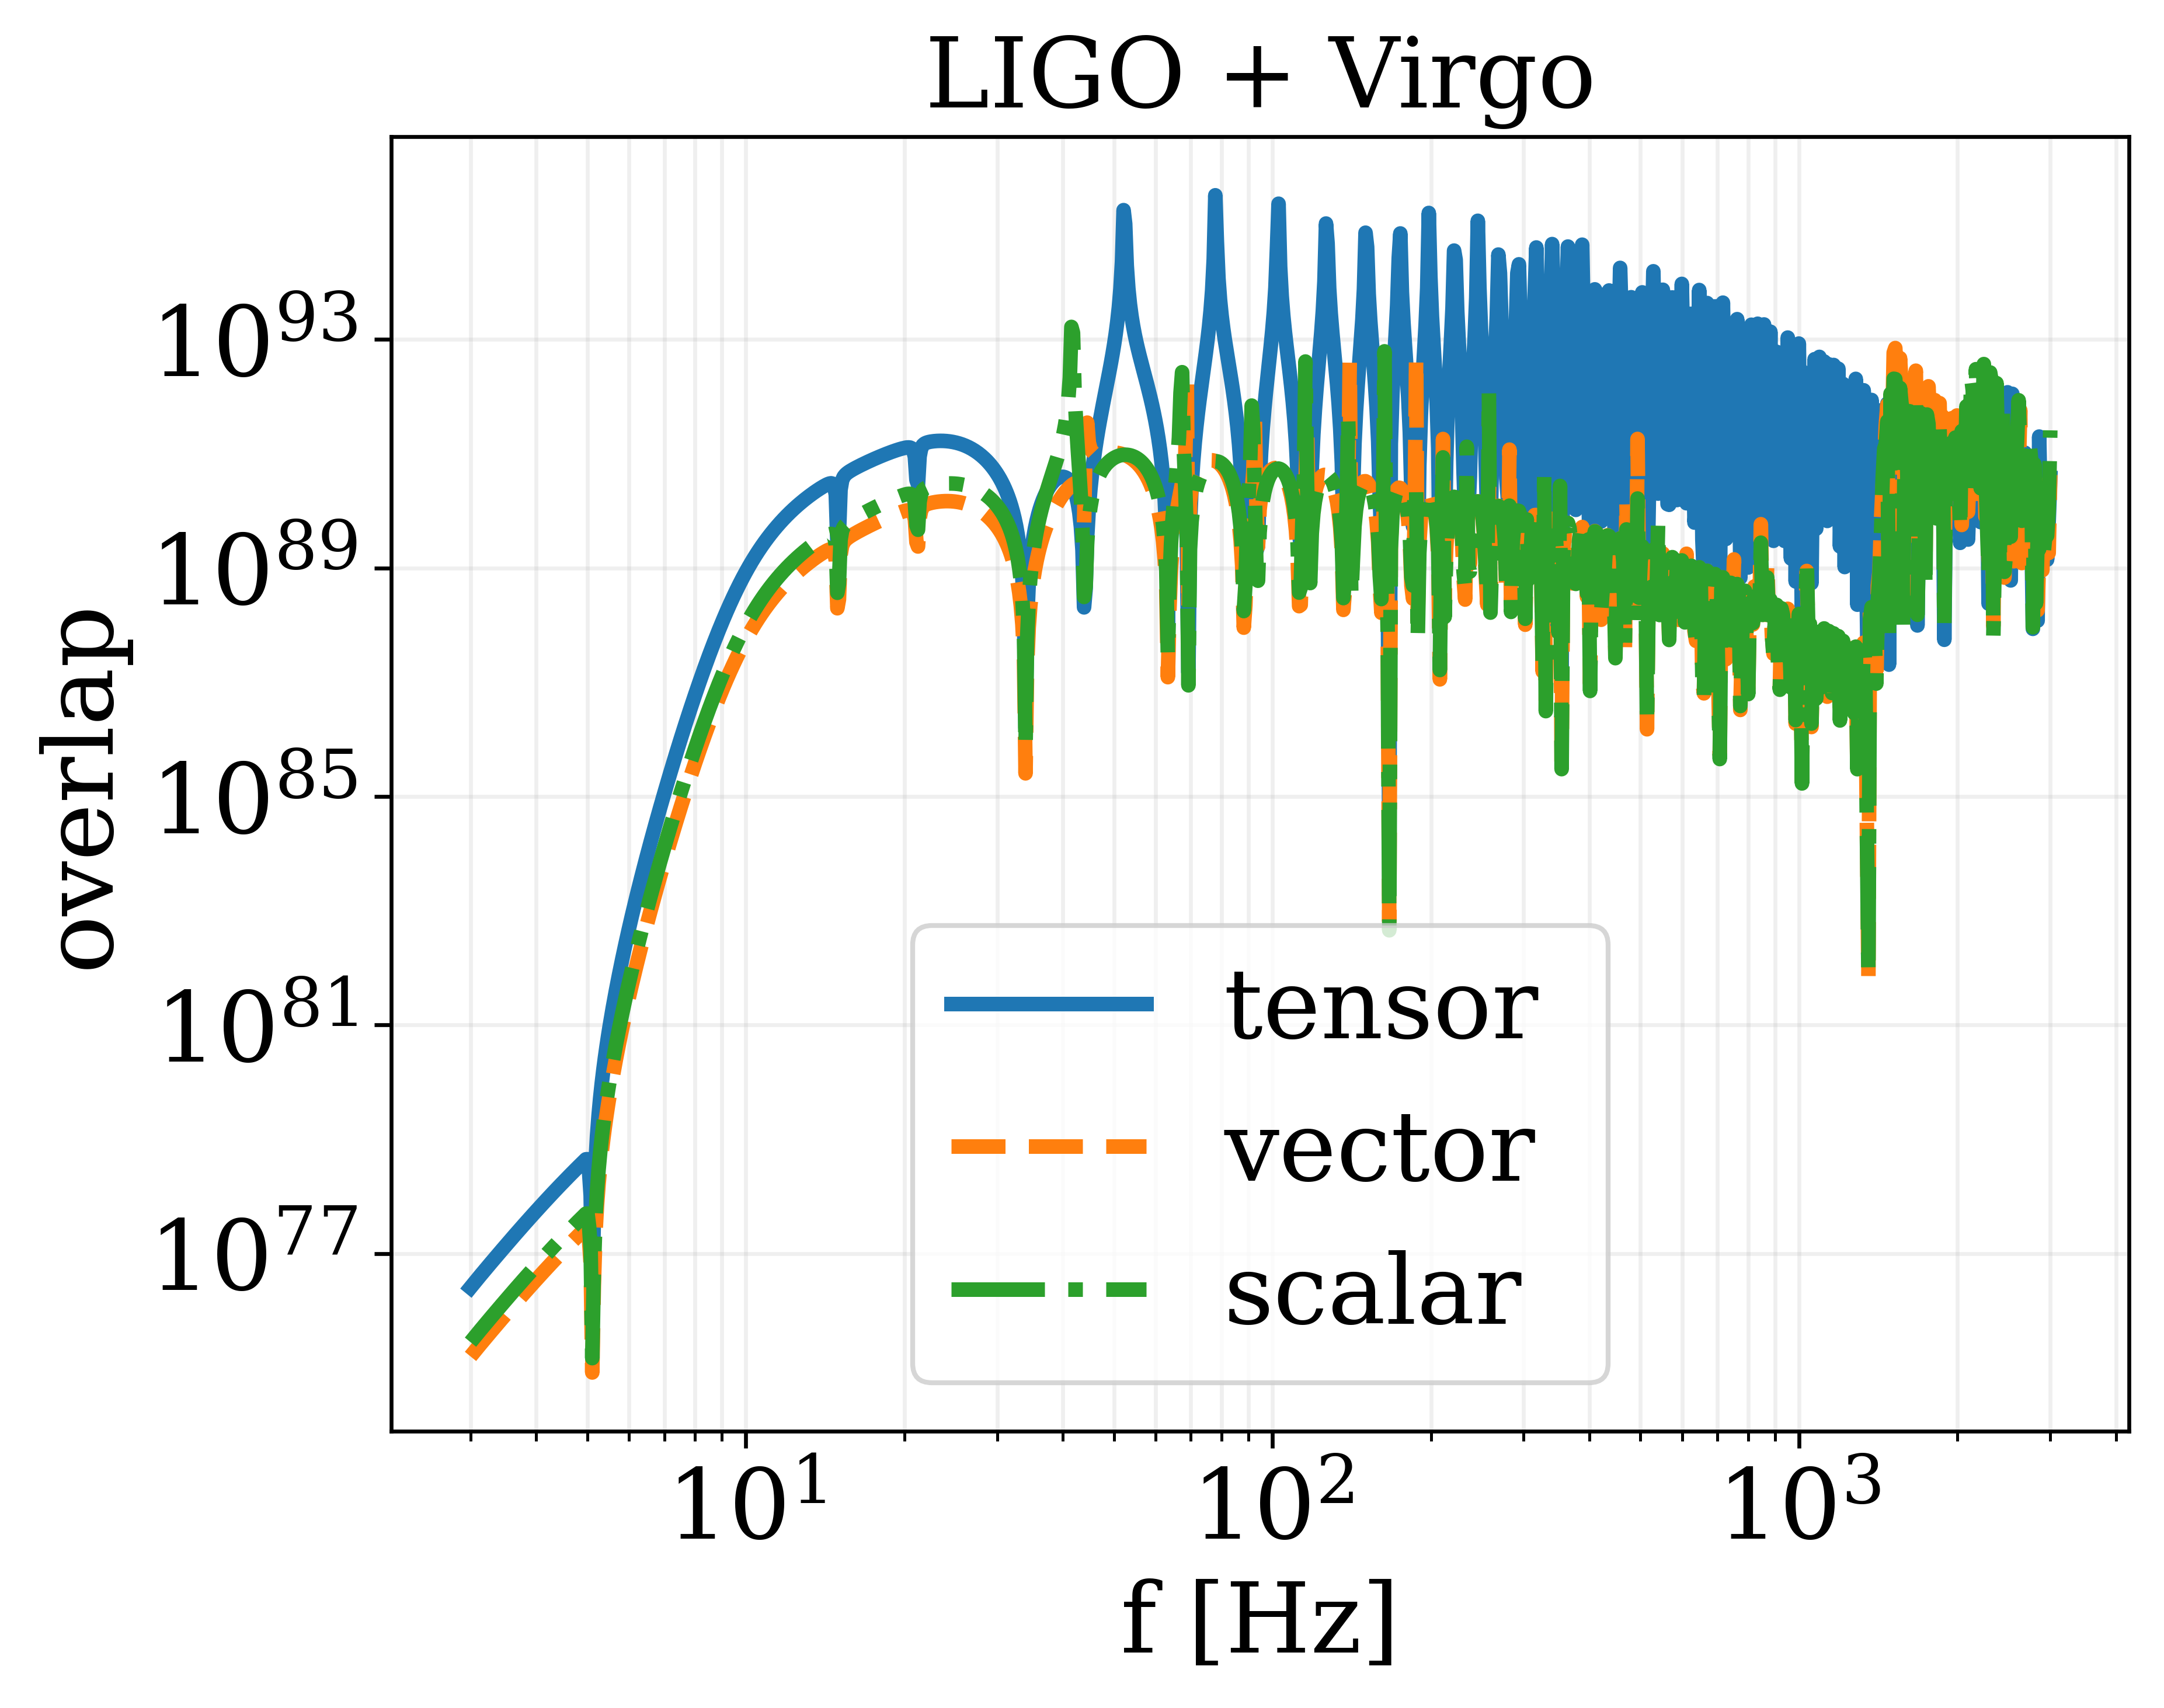

In [48]:
plt.plot(f, orf_reweighted_t, label='tensor ')  
plt.plot(f, orf_reweighted_v, label='vector', linestyle='--')
plt.plot(f, orf_reweighted_s, label='scalar', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('overlap')
plt.title(r'LIGO + Virgo')
plt.grid(alpha=0.2, which='both')
plt.legend()

* ET 2L $\alpha = 0^{\circ} $ + CE

In [40]:
# tensor + vector modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_tv_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_ts_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

KeyboardInterrupt: 

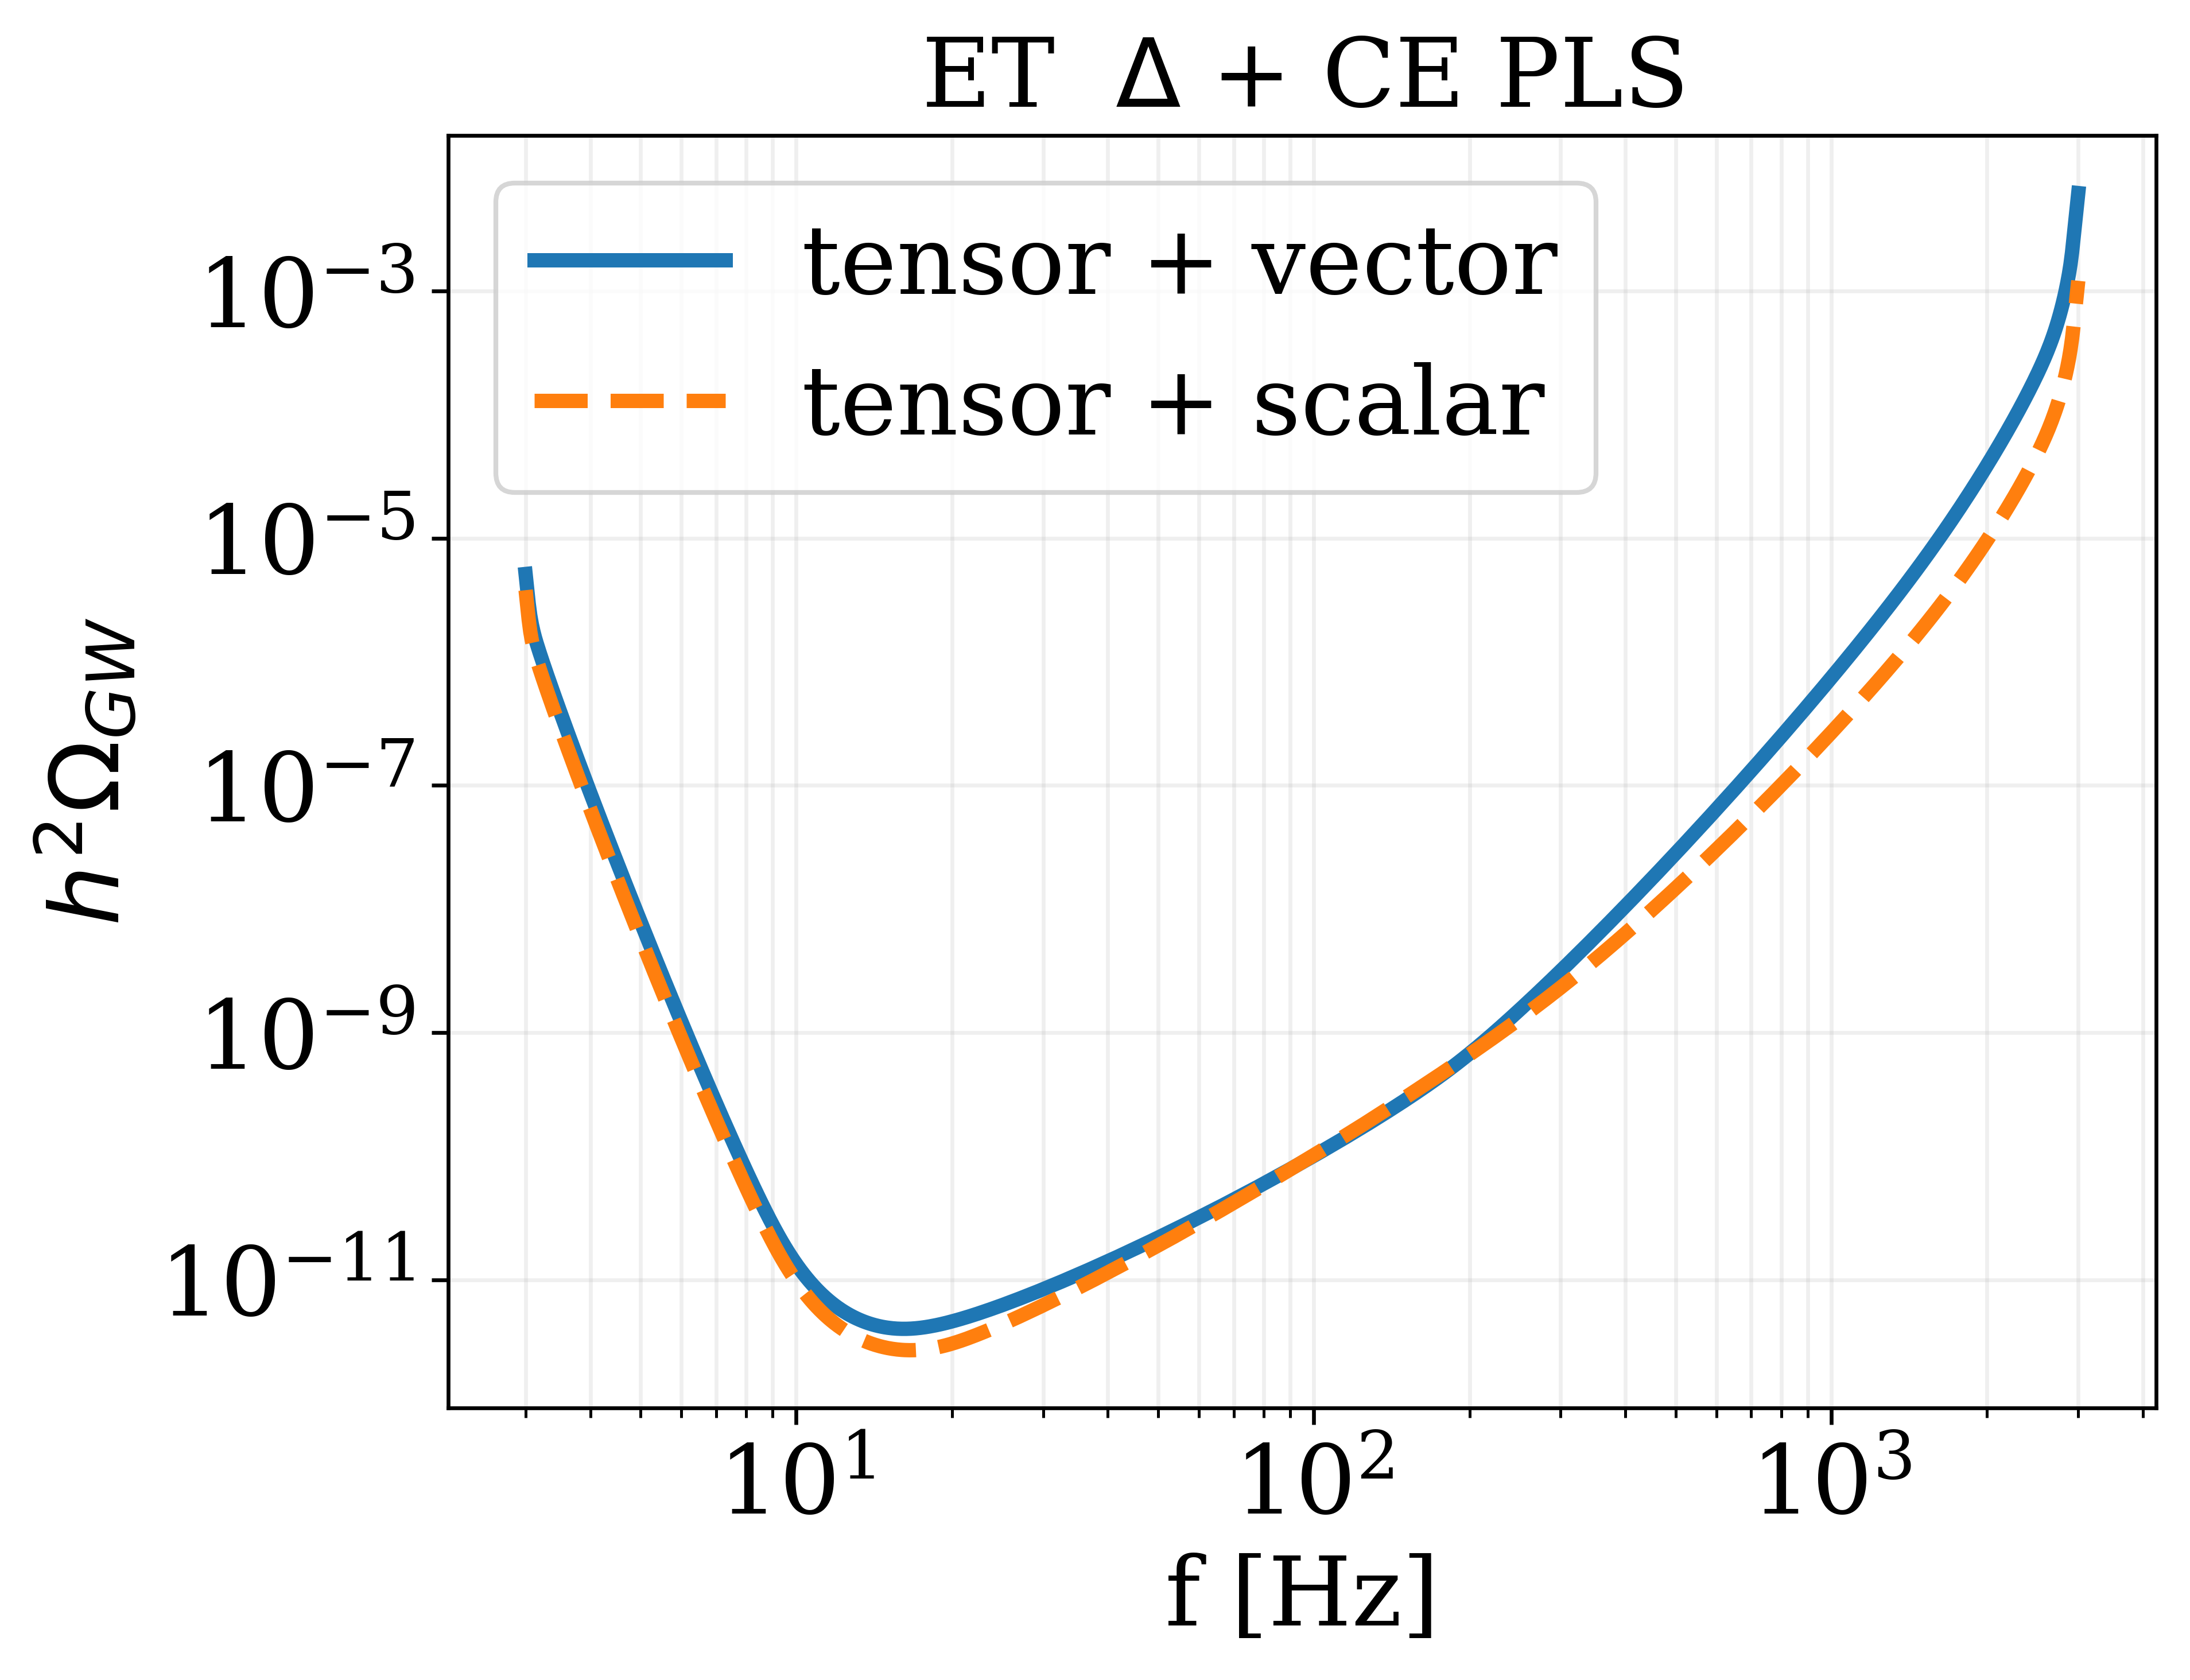

In [9]:
plt.plot(f, pls_tv_etCE, label='tensor + vector')
plt.plot(f, pls_ts_etCE, label='tensor + scalar', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET 2L $\alpha=0^{\circ}$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [10]:
# find minimum

min_PLS_tv = np.min(pls_tv_etCE)
print('min PLS tv', min_PLS_tv)

min_PLS_ts = np.min(pls_ts_etCE)
print('min PLS ts', min_PLS_ts)

min PLS tv 4.010502091663442e-12
min PLS ts 2.6937199126478116e-12


In [34]:
# tensor + vector + scalar modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_t_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_v_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_s_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

In [35]:
pls_t_etCE_2 = pls.PLS_multi('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, None)

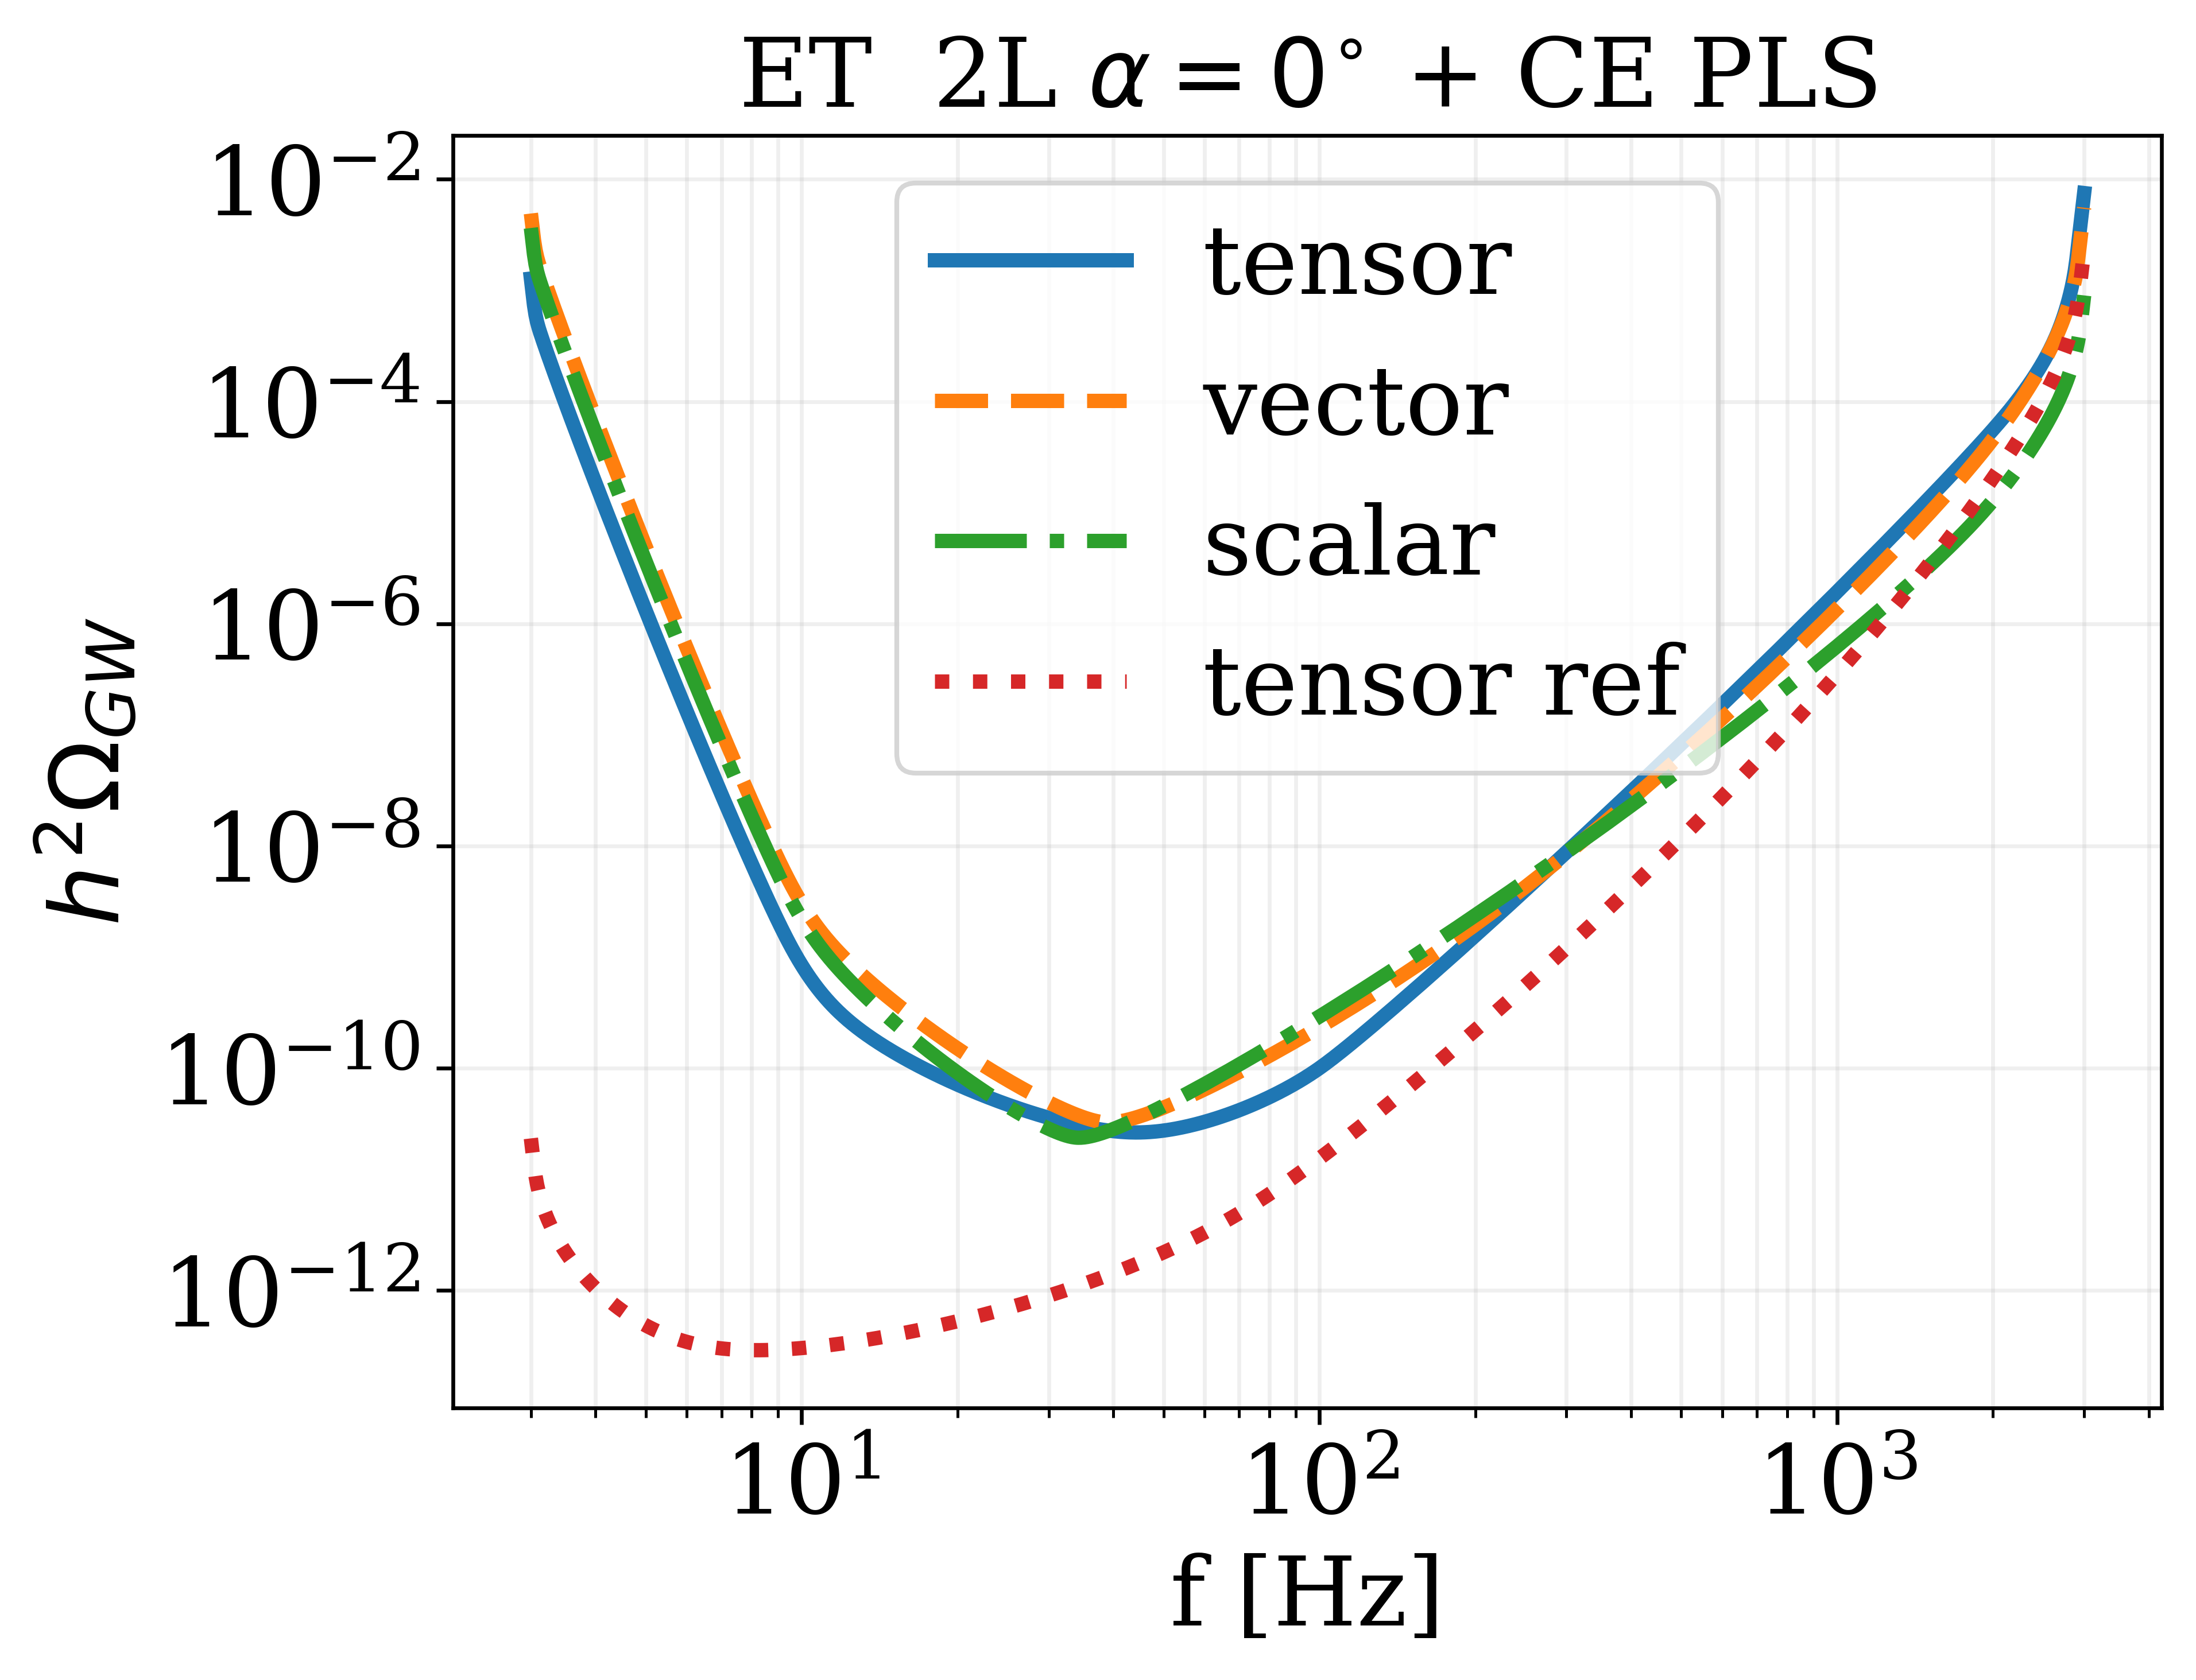

In [36]:
plt.plot(f, pls_t_etCE, label='tensor ')
plt.plot(f, pls_v_etCE, label='vector', linestyle='--')
plt.plot(f, pls_s_etCE, label='scalar', linestyle='-.')
#plt.plot(f, pls_t_etCE_2, label='tensor ref', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  2L $\alpha = 0^{\circ}$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [54]:
# find minimum

min_PLS_t = np.min(pls_t_etCE)  
print('min PLS t', min_PLS_t)

min_PLS_v = np.min(pls_v_etCE)
print('min PLS v', min_PLS_v)

min_PLS_s = np.min(pls_s_etCE)
print('min PLS s', min_PLS_s)

min PLS t 1.2540793187229001e-10
min PLS v 8.133661930380789e-10
min PLS s 5.060078667405974e-10


* ET 2L $\alpha = 45^{\circ} $ + CE

In [14]:
# tensor + vector modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_tv_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))
pls_ts_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))


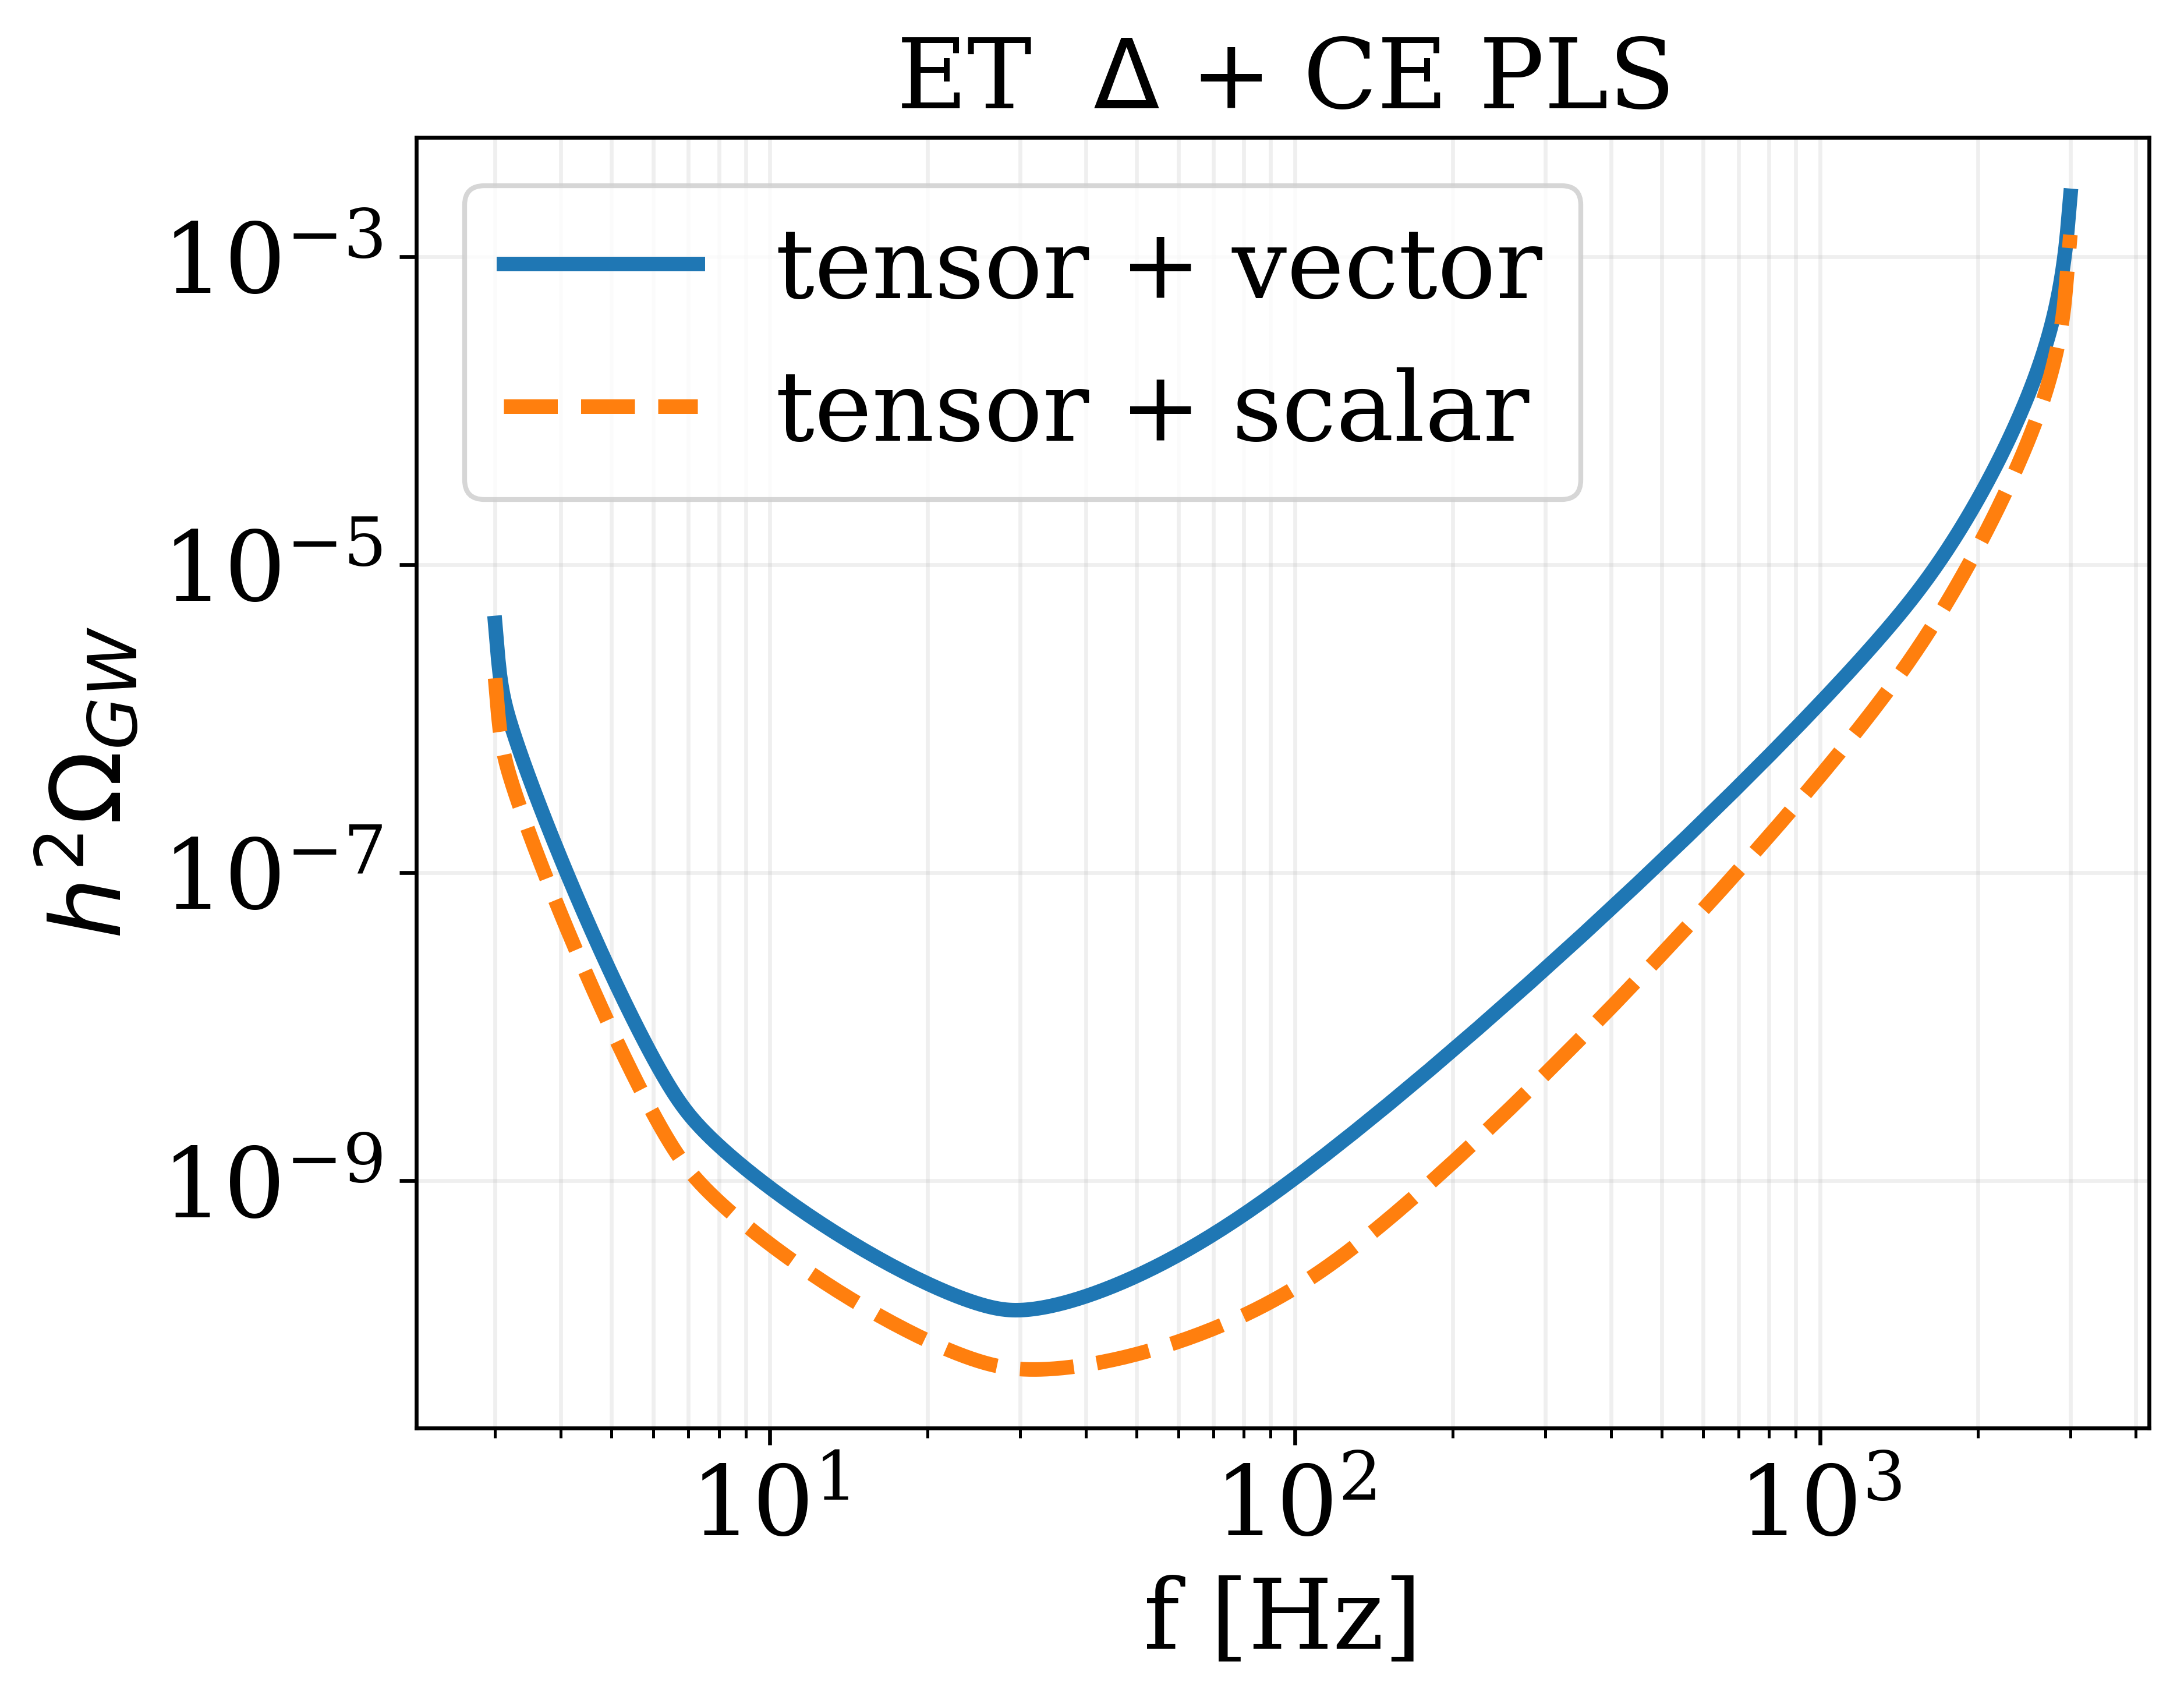

In [15]:
plt.plot(f, pls_tv_etCE, label='tensor + vector')
plt.plot(f, pls_ts_etCE, label='tensor + scalar', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [16]:
# find minimum

min_PLS_tv = np.min(pls_tv_etCE)
print('min PLS tv', min_PLS_tv)

min_PLS_ts = np.min(pls_ts_etCE)
print('min PLS ts', min_PLS_ts)

min PLS tv 1.4423431730887165e-10
min PLS ts 5.942098457868662e-11


In [17]:
# tensor + vector + scalar modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_t_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))
pls_v_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))
pls_s_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))

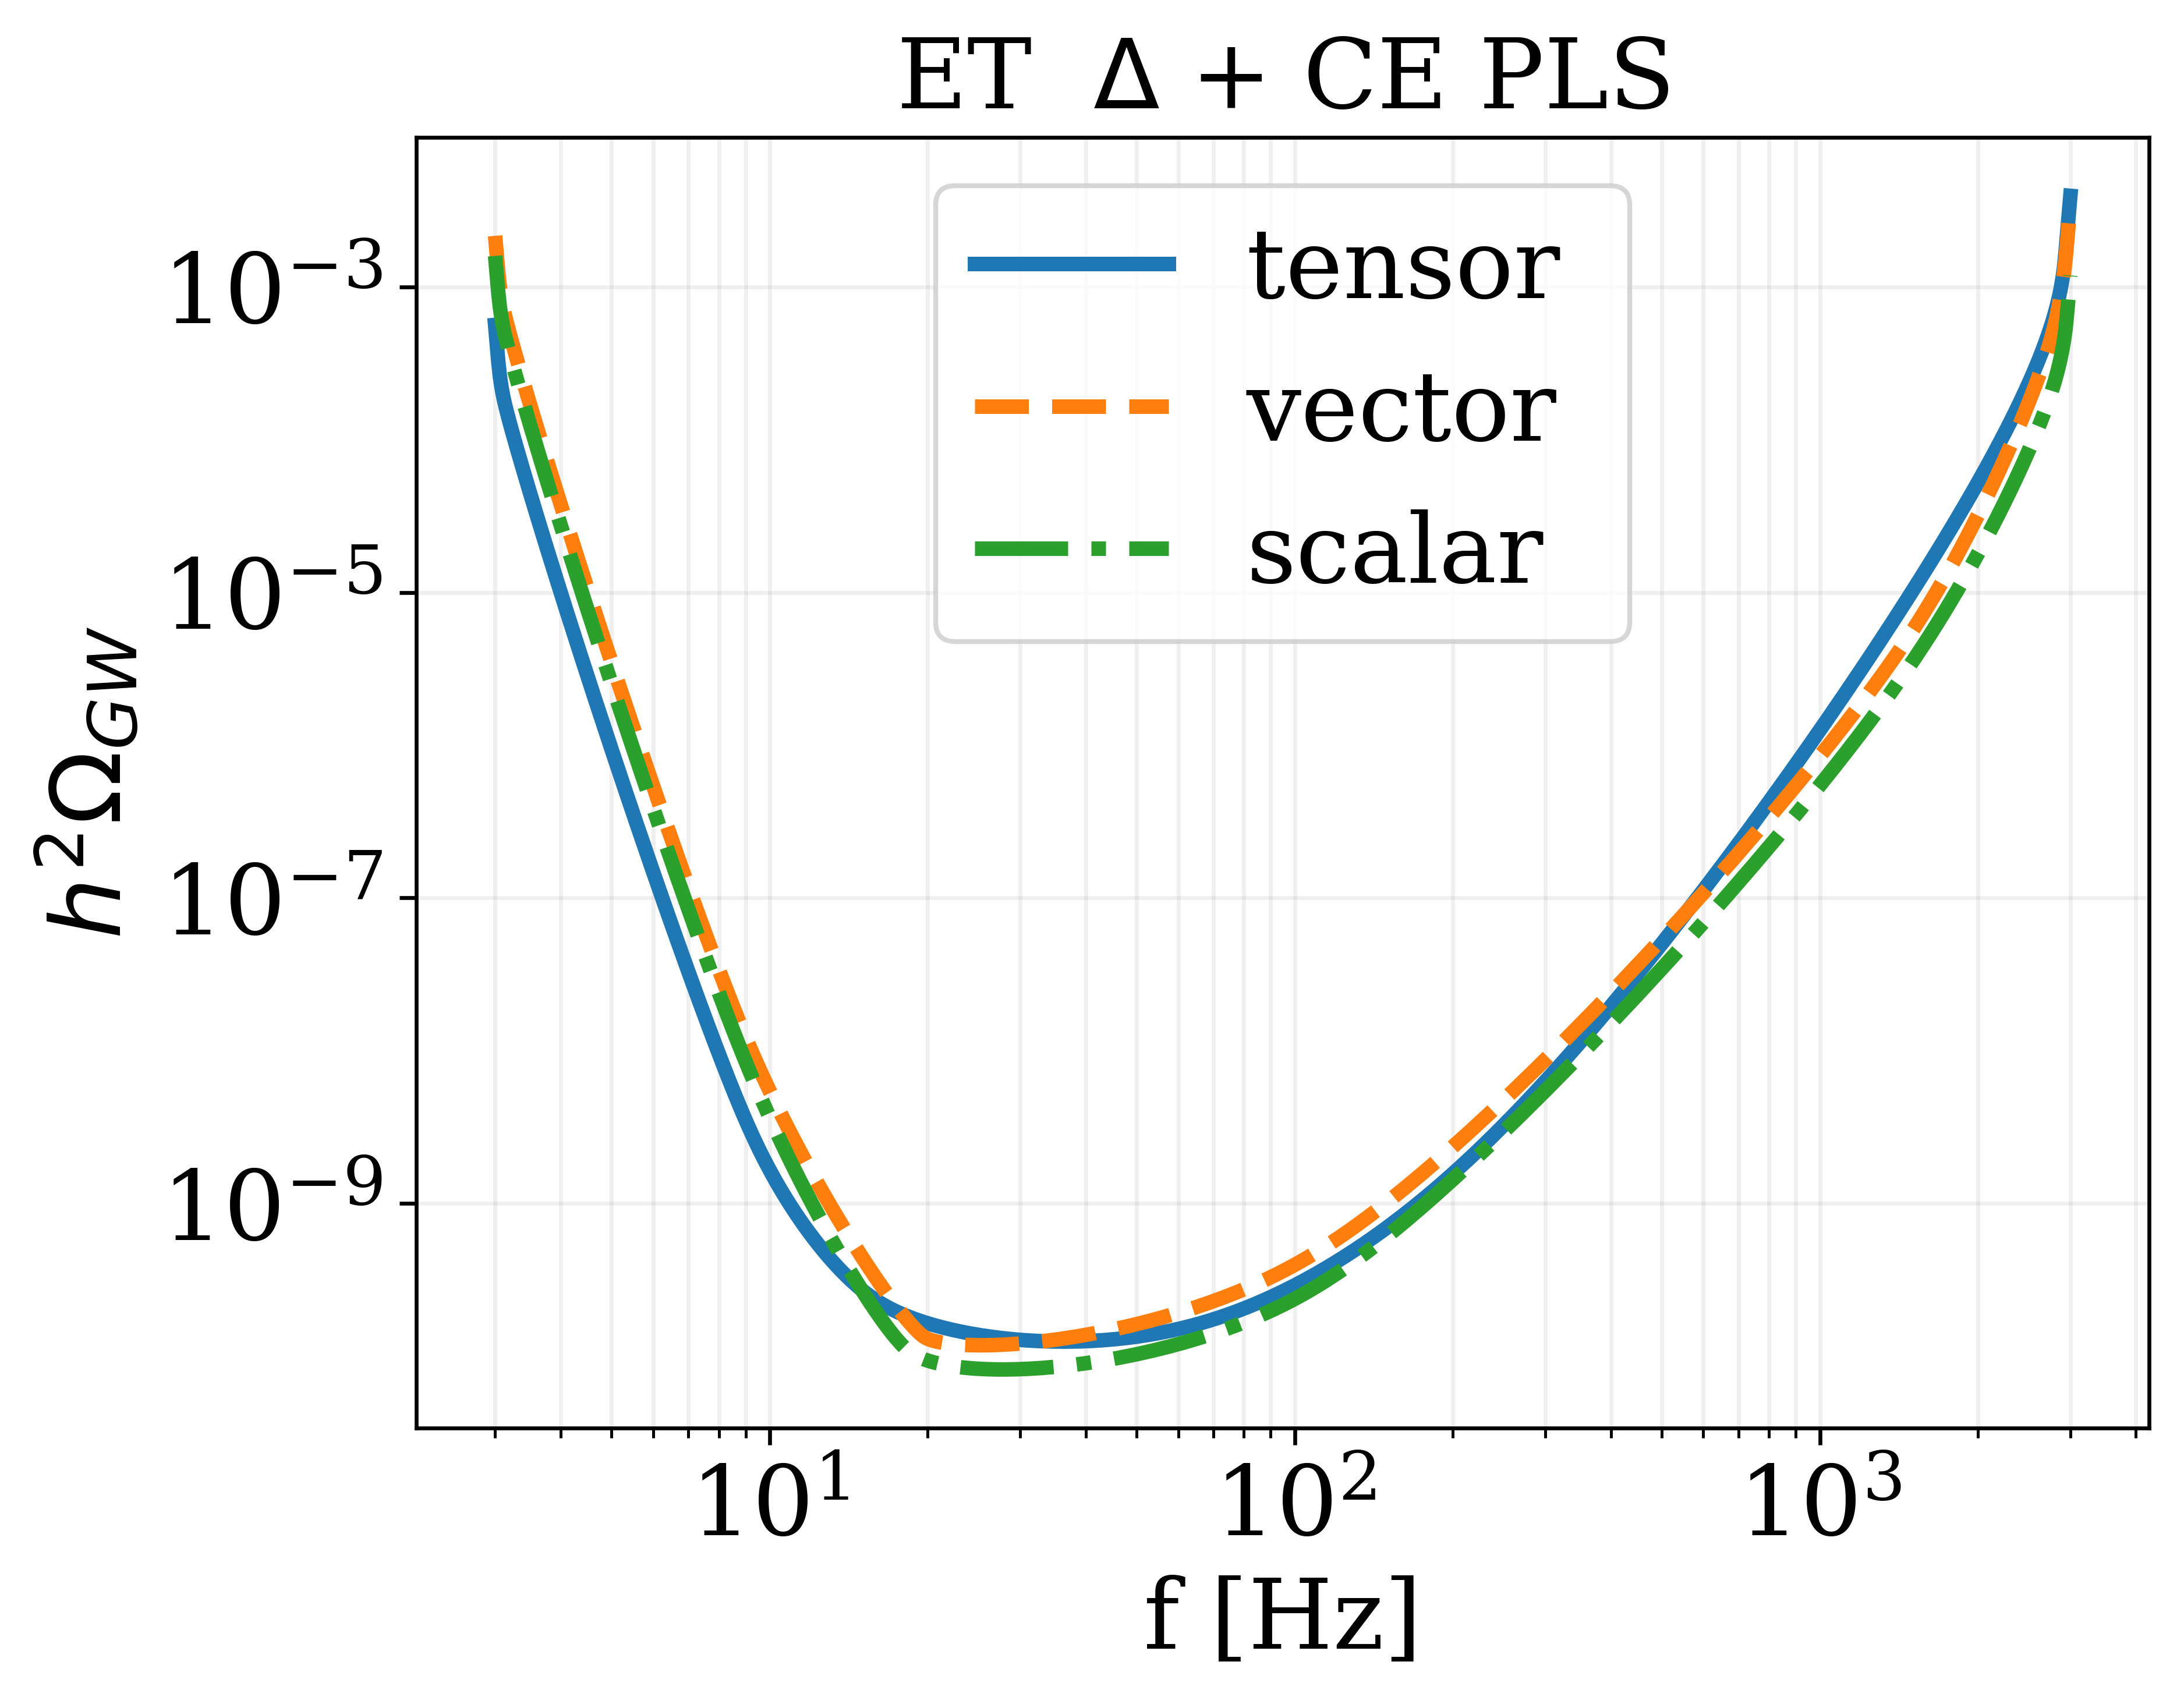

In [18]:
plt.plot(f, pls_t_etCE, label='tensor ')
plt.plot(f, pls_v_etCE, label='vector', linestyle='--')
plt.plot(f, pls_s_etCE, label='scalar', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [19]:
# find minimum

min_PLS_t = np.min(pls_t_etCE)  
print('min PLS t', min_PLS_t)

min_PLS_v = np.min(pls_v_etCE)
print('min PLS v', min_PLS_v)

min_PLS_s = np.min(pls_s_etCE)
print('min PLS s', min_PLS_s)

min PLS t 1.243960994964515e-10
min PLS v 1.1770079327234167e-10
min PLS s 8.17181715257973e-11


plt con sensitivity ai tensori 

In [41]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_t_LIGO_Virgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_v_LIGO_Virgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_s_LIGO_Virgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

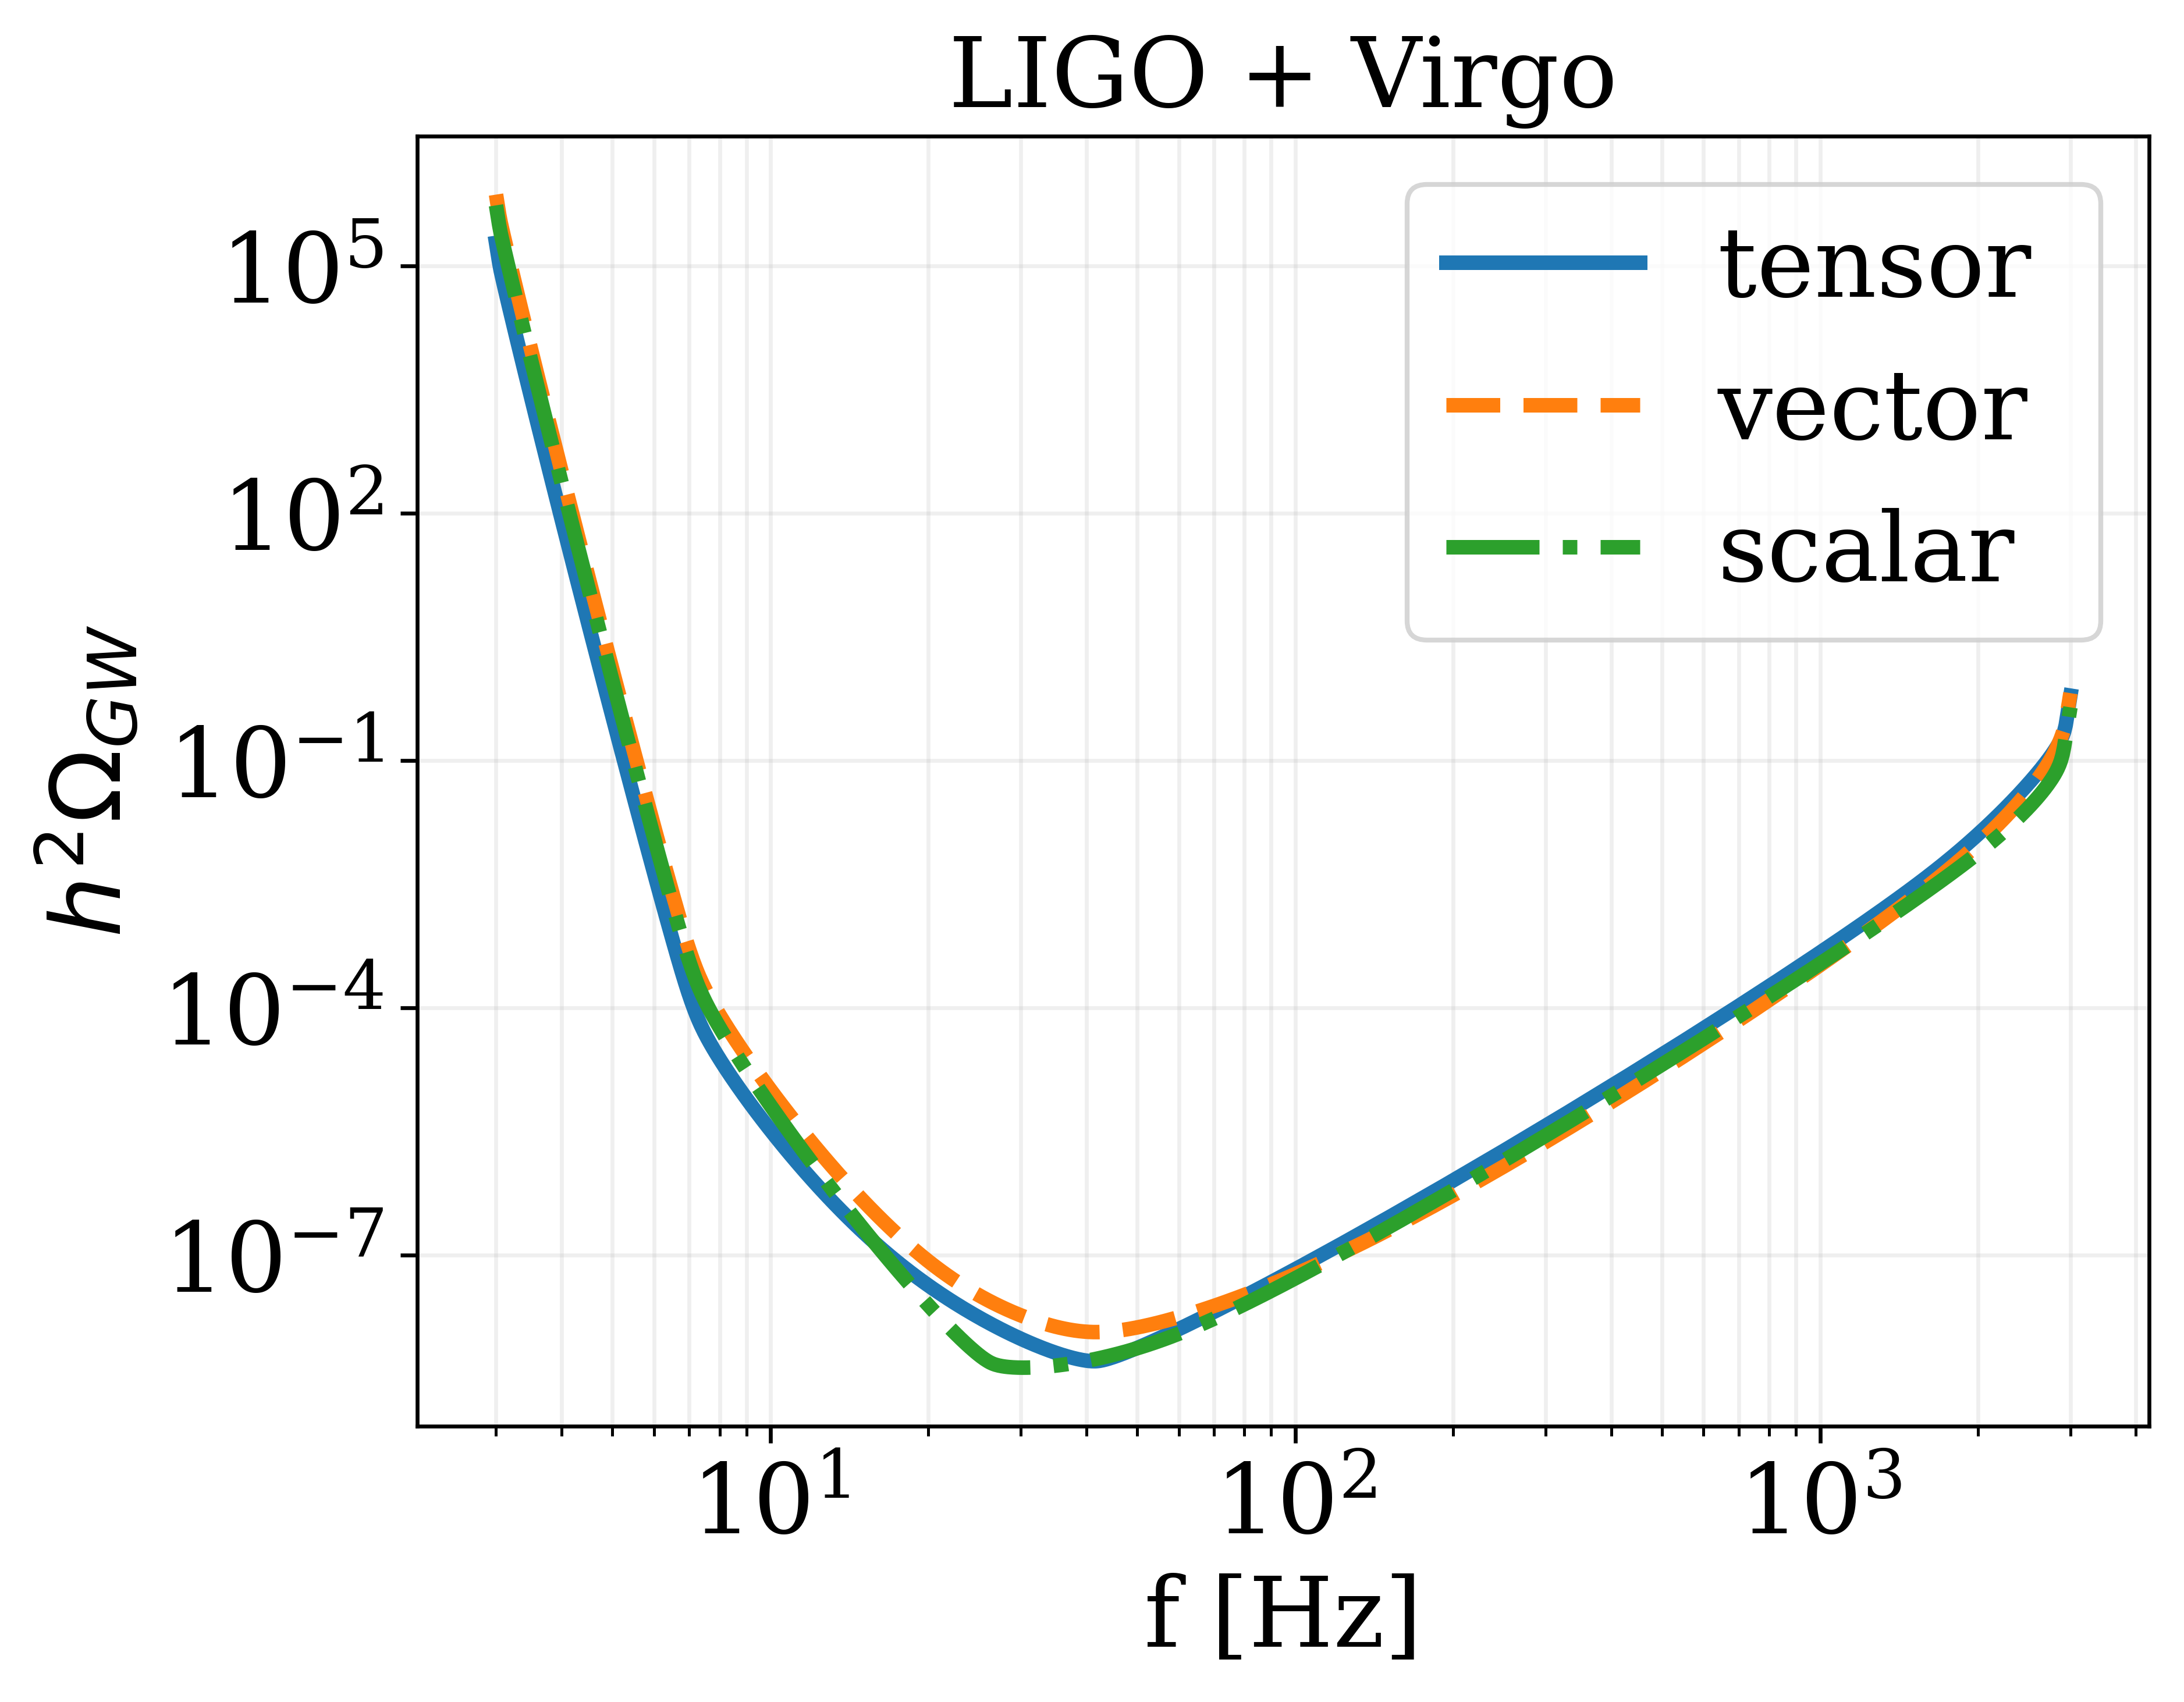

In [43]:
plt.plot(f, pls_t_LIGO_Virgo, label='tensor ')
plt.plot(f, pls_v_LIGO_Virgo, label='vector', linestyle='--')
plt.plot(f, pls_s_LIGO_Virgo, label='scalar', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title(r'LIGO + Virgo')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [45]:
orf_reweighted_t = overlap.overlap_3pol('LIGO H', 'LIGO L', 'Virgo', f, 't', None)
orf_reweighted_v = overlap.overlap_3pol('LIGO H', 'LIGO L', 'Virgo', f, 'v', None)
orf_reweighted_s = overlap.overlap_3pol('LIGO H', 'LIGO L', 'Virgo', f, 's', None)

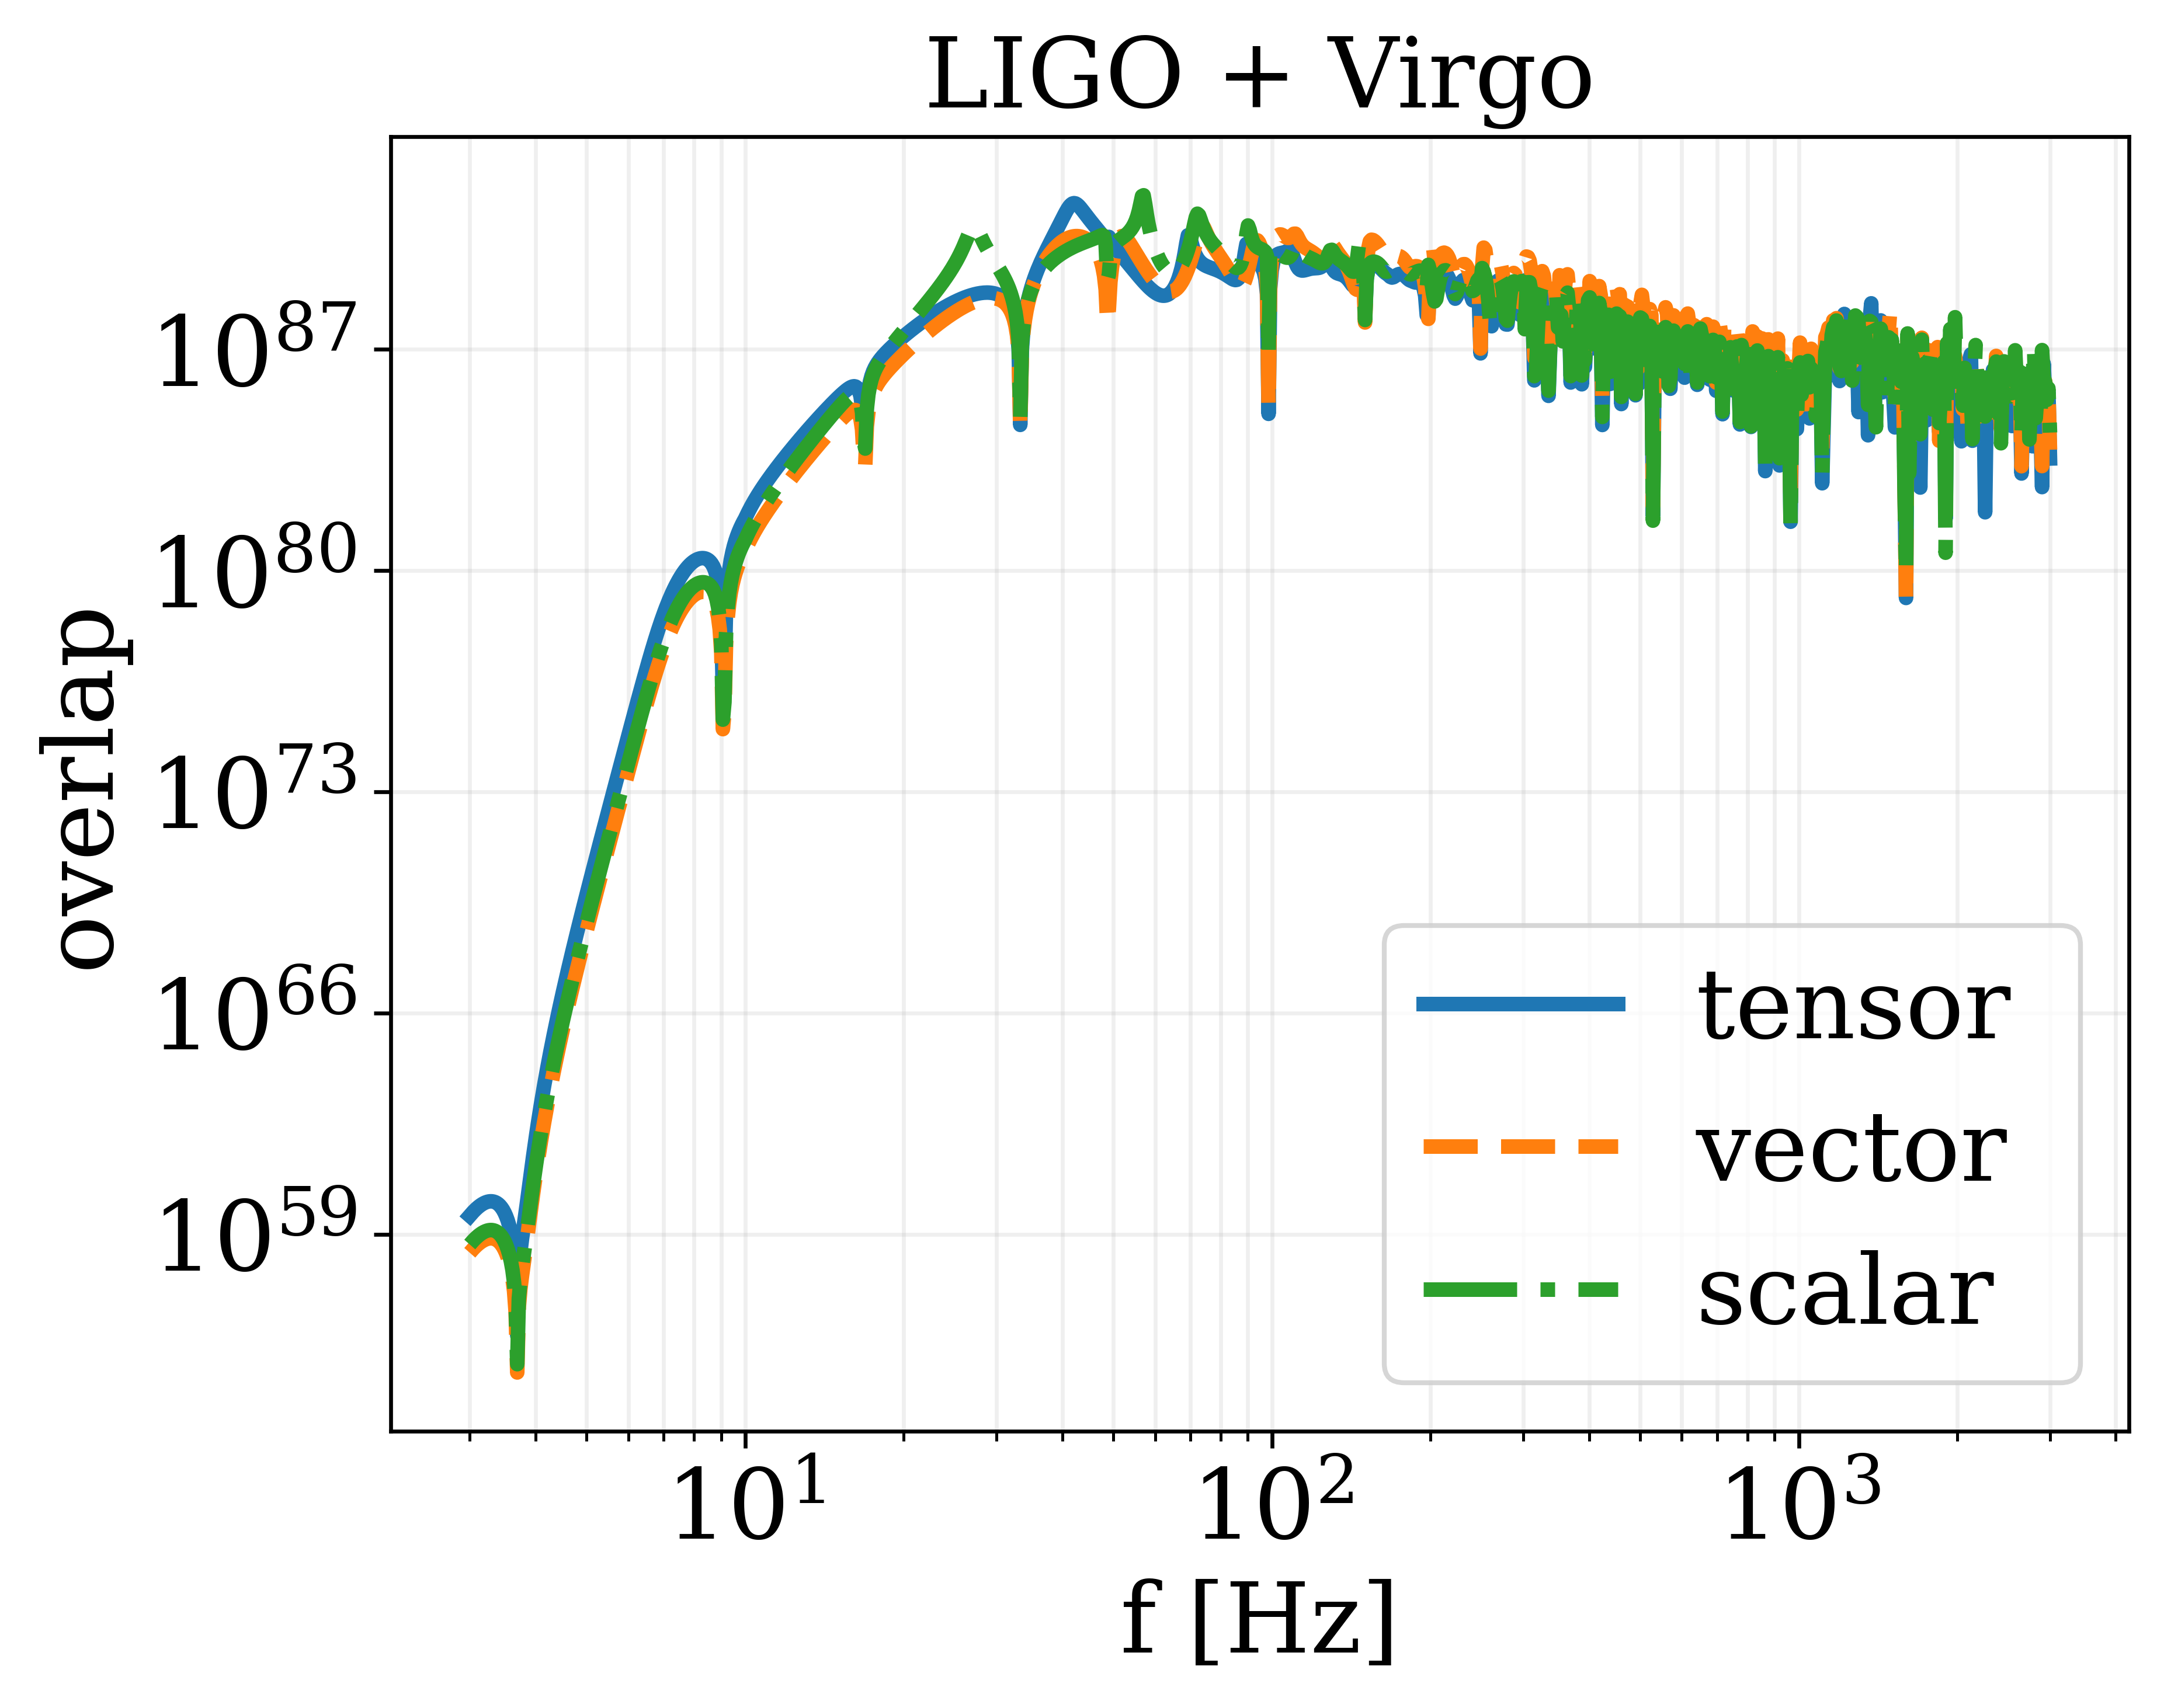

In [46]:
plt.plot(f, orf_reweighted_t, label='tensor ')  
plt.plot(f, orf_reweighted_v, label='vector', linestyle='--')
plt.plot(f, orf_reweighted_s, label='scalar', linestyle='-.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('overlap')
plt.title(r'LIGO + Virgo')
plt.grid(alpha=0.2, which='both')
plt.legend()
